# 1. Initialisation et Importation des Librairies

**Objectif :**
Préparer l'environnement Python en important les outils nécessaires pour l'analyse de données, la visualisation et le machine learning.

**Détail du Code et Variables :**
- `import pandas as pd` : Charge la librairie **Pandas**, essentielle pour manipuler des données sous forme de tableaux (DataFrames).
- `import numpy as np` : Charge **NumPy**, utilisé pour les calculs mathématiques performants.
- `import matplotlib.pyplot` & `seaborn` : Librairies de visualisation pour créer des graphiques.
- `warnings.filterwarnings('ignore')` : Désactive les messages d'avertissement non critiques pour garder la sortie propre.
- **Modules Scikit-Learn (`sklearn`)** :
  - `OneHotEncoder`, `OrdinalEncoder` : Pour transformer les textes en nombres.
  - `StandardScaler` : Pour mettre les chiffres à la même échelle.
  - `ColumnTransformer`, `Pipeline` : Pour automatiser les transformations.

**Résultat attendu :**
Affichage de " Librairies importées". Aucune erreur ne doit apparaître, signifiant que tous les packages sont installés.

In [5]:
# 1. Initialisation et import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print(' Librairies importées')

 Librairies importées


# 2. Chargement des Jeux de Données

**Objectif :**
Lire les fichiers CSV source et les stocker dans des variables (DataFrames) pour l'analyse.

**Détail du Code et Variables :**
- `PATH_...` : Constantes définissant l'emplacement des fichiers sur le disque.
- `pd.read_csv(PATH)` : Fonction Pandas qui lit un fichier texte séparé par des virgules et crée un DataFrame.
- **Variables créées :**
  - `general_data` : Données principales RH (âge, salaire, etc.).
  - `manager_survey` : Satisfaction vis-à-vis du management.
  - `employee_survey` : Satisfaction vis-à-vis de l'environnement.
  - `in_time` / `out_time` : Heures d'arrivée et de départ quotidiennes.

**Résultat attendu :**
Affichage des dimensions `(lignes, colonnes)` pour chaque table, confirmant que les données sont bien chargées (ex: 4410 employés).

In [6]:
# Chemins relatifs (exécution depuis la racine du projet)
PATH_GENERAL = 'data project IA/general_data.csv'
PATH_MANAGER = 'data project IA/manager_survey_data.csv'
PATH_EMPLOYEE = 'data project IA/employee_survey_data.csv'
PATH_IN_TIME = 'data project IA/in_out_time/in_time.csv'
PATH_OUT_TIME = 'data project IA/in_out_time/out_time.csv'

print(' Chargement des fichiers...')
general_data = pd.read_csv(PATH_GENERAL)
print(f'   ➜ general_data: {general_data.shape}')
manager_survey = pd.read_csv(PATH_MANAGER)
print(f'   ➜ manager_survey: {manager_survey.shape}')
employee_survey = pd.read_csv(PATH_EMPLOYEE)
print(f'   ➜ employee_survey: {employee_survey.shape}')
in_time = pd.read_csv(PATH_IN_TIME)
print(f'   ➜ in_time: {in_time.shape}')
out_time = pd.read_csv(PATH_OUT_TIME)
print(f'   ➜ out_time: {out_time.shape}')

print('Aperçus rapides :')
display(general_data.head(2))
display(manager_survey.head(2))
display(employee_survey.head(2))
display(in_time.iloc[:3, :5])

 Chargement des fichiers...
   ➜ general_data: (4410, 24)
   ➜ manager_survey: (4410, 3)
   ➜ employee_survey: (4410, 4)
   ➜ in_time: (4410, 262)
   ➜ out_time: (4410, 262)
Aperçus rapides :


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4


,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0


,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13


# 3. Préparation des Données Temporelles

**Objectif :**
Standardiser les tableaux d'heures (`in_time` et `out_time`) pour qu'ils soient exploitables.

**Détail du Code et Variables :**
- `df_in = in_time.copy()` : Crée une copie indépendante pour ne pas modifier l'original.
- `rename(columns={...})` : Renomme la première colonne (souvent vide ou nommée "Unnamed") en `EmployeeID` pour servir d'identifiant unique.
- `set_index('EmployeeID')` : Définit l'ID employé comme index des lignes. Cela permet d'aligner parfaitement les tableaux `in` et `out` pour faire des soustractions (départ - arrivée).

**Résultat attendu :**
Message confirmant le nombre de jours suivis (colonnes) et d'employés (lignes).

In [7]:
# Préparation : renommer la première colonne en EmployeeID si besoin, définir l'index
df_in = in_time.copy()
df_out = out_time.copy()

first_col_in = df_in.columns[0]
first_col_out = df_out.columns[0]

df_in.rename(columns={first_col_in: 'EmployeeID'}, inplace=True)
df_out.rename(columns={first_col_out: 'EmployeeID'}, inplace=True)
df_in.set_index('EmployeeID', inplace=True)
df_out.set_index('EmployeeID', inplace=True)

print(f' Jours tracés: {len(df_in.columns)}, employés: {len(df_in)}')

 Jours tracés: 261, employés: 4410


# 4. Conversion des Dates

**Objectif :**
Transformer les chaînes de caractères (ex: "2015-01-01 09:00") en objets temporels Python (`datetime`) pour pouvoir faire des calculs de durée.

**Détail du Code et Variables :**
- `pd.to_datetime(..., errors='coerce')` : Tente de convertir chaque valeur en date. Si la conversion échoue (case vide ou format invalide), la valeur devient `NaT` (Not a Time), l'équivalent temporel de `NaN`.
- `convert_to_datetime(df)` : Fonction utilitaire qui applique cette transformation à toutes les colonnes d'un DataFrame.

**Résultat attendu :**
Affichage de " Conversion datetime terminée". Les données sont maintenant prêtes pour des opérations mathématiques (soustractions).

In [8]:
# Conversion des colonnes en datetime (coerce errors -> NaT)
def convert_to_datetime(df):
    df_dt = df.copy()
    for col in df_dt.columns:
        df_dt[col] = pd.to_datetime(df_dt[col], errors='coerce')
    return df_dt

df_in_dt = convert_to_datetime(df_in)
df_out_dt = convert_to_datetime(df_out)
print(' Conversion datetime terminée')

 Conversion datetime terminée


# 5. Feature Engineering : Calcul des Horaires

**Objectif :**
Créer de nouvelles informations (features) résumant le comportement horaire de chaque employé.

**Détail du Code et Variables :**
- `work_duration = df_out_dt - df_in_dt` : Calcule la durée de présence brute pour chaque jour.
- `dt.total_seconds() / 3600` : Convertit chaque durée en **heures décimales** (ex: 7h30 -> 7.5).
- **Nouvelles Variables Calculées :**
  - `MeanDailyHours` : Durée moyenne de travail par jour.
  - `StdDailyHours` : Écart-type (variabilité) des horaires. Un chiffre élevé signifie des horaires irréguliers.
  - `WorkedDays` : Nombre de jours où l'employé était présent (ignorant les absences/congés).
  - `MeanArrivalHour` : Heure d'arrivée moyenne (ex: 9.5 pour 9h30).
  - `VarianceArrival` : Régularité de l'heure d'arrivée.

**Résultat attendu :**
Un tableau `df_horaires` synthétique résumant l'assiduité de chaque employé.

In [9]:
# Calcul des durées journalières en heures (out - in) et features agrégées par employé
work_duration = df_out_dt - df_in_dt
work_hours = work_duration.apply(lambda col: col.dt.total_seconds() / 3600)

mean_daily_hours = work_hours.mean(axis=1, skipna=True)
std_daily_hours = work_hours.std(axis=1, skipna=True)
worked_days = work_hours.notna().sum(axis=1)

# Heure d'arrivée en heures décimales + variance d'arrivée
arrival_hours = df_in_dt.apply(lambda col: col.dt.hour + col.dt.minute/60, axis=0)
mean_arrival_hour = arrival_hours.mean(axis=1, skipna=True)
variance_arrival = arrival_hours.var(axis=1, skipna=True)

df_horaires = pd.DataFrame({
    'EmployeeID': work_hours.index,
    'MeanDailyHours': mean_daily_hours.values,
    'StdDailyHours': std_daily_hours.values,
    'WorkedDays': worked_days.values,
    'MeanArrivalHour': mean_arrival_hour.values,
    'VarianceArrival': variance_arrival.values
})

df_horaires.reset_index(drop=True, inplace=True)
print(' Aperçu df_horaires:')
display(df_horaires.head())
print(f'Dimensions df_horaires: {df_horaires.shape}')

 Aperçu df_horaires:


,EmployeeID,MeanDailyHours,StdDailyHours,WorkedDays,MeanArrivalHour,VarianceArrival
0,1,7.373651,0.283224,232,9.993032,0.066799
1,2,7.718969,0.313351,236,9.980720,0.085904
2,3,7.013240,0.311551,242,10.016598,0.074263
3,4,7.193678,0.284133,235,9.973830,0.079947
4,5,8.006175,0.300656,245,9.990068,0.073366


Dimensions df_horaires: (4410, 6)


# 6. Fusion des Données (Merging)

**Objectif :**
Rassembler toutes les informations éparses en une seule vue consolidée.

**Détail du Code et Variables :**
- `merge(..., on='EmployeeID', how='left')` : Jointure de type "gauche". On garde tous les employés de la table de gauche (`general_data`) et on y colle les infos correspondantes des autres tables.
- `df` : Le DataFrame final qui grandit à chaque étape de fusion.

**Résultat attendu :**
Le `df` final doit avoir 4410 lignes (nombre d'employés) et environ 30+ colonnes combinant RH, sondages et horaires.

In [10]:
# Fusion successive (left joins) sur EmployeeID
df = general_data.merge(manager_survey, on='EmployeeID', how='left')
df = df.merge(employee_survey, on='EmployeeID', how='left')
df = df.merge(df_horaires, on='EmployeeID', how='left')
print(f'Après fusion : {df.shape}')

Après fusion : (4410, 34)


# 7. Nettoyage : Suppression de Colonnes Inutiles

**Objectif :**
Alléger le jeu de données en retirant les colonnes qui n'apportent aucune information utile (valeurs constantes).

**Détail du Code et Variables :**
- `cols_to_drop` : Liste des colonnes suspectes.
  - `EmployeeCount` : Vaut 1 pour tout le monde.
  - `Over18` : Tous les employés sont majeurs ('Y').
  - `StandardHours` : Fixé à 8h pour tous.
- `drop(columns=...)` : Supprime ces colonnes du DataFrame.

**Résultat attendu :**
Affichage des colonnes supprimées. Le modèle d'IA ne peut pas apprendre d'une variable qui ne varie jamais, leur suppression est donc bénéfique.

In [11]:
# Suppression des colonnes non informatives si elles existent
cols_to_drop = ['EmployeeCount', 'Over18', 'StandardHours']
existing = [c for c in cols_to_drop if c in df.columns]
if existing:
    df.drop(columns=existing, inplace=True)
    print(f'Colonnes supprimées : {existing}')
else:
    print('Aucune colonne à supprimer parmi la liste standard')
print(f'Dimensions après suppression : {df.shape}')

Colonnes supprimées : ['EmployeeCount', 'Over18', 'StandardHours']
Dimensions après suppression : (4410, 31)


# 8. Analyse des Valeurs Manquantes

**Objectif :**
Identifier les trous dans les données pour décider comment les combler.

**Détail du Code et Variables :**
- `missing = df.isnull().sum()` : Compte le nombre de cases vides (`NaN`) pour chaque colonne.
- `missing_pct` : Calcule le pourcentage de vide. `(Nombre de vides / Nombre total de lignes) * 100`.
- `missing_df` : DataFrame temporaire créé pour afficher joliment ces statistiques.

**Résultat attendu :**
Un tableau montrant les colonnes critiques. Par exemple, si `WorkLifeBalance` a 0.8% de vides, on sait qu'il faudra traiter ces quelques cas.

In [12]:
# Analyse des NaN par colonne
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'missing_count': missing, 'missing_pct': missing_pct.round(3)})
missing_df = missing_df[missing_df['missing_count']>0].sort_values('missing_pct', ascending=False)
print(' Valeurs manquantes (colonnes avec NaN) :')
display(missing_df)

 Valeurs manquantes (colonnes avec NaN) :


,missing_count,missing_pct
WorkLifeBalance,38,0.862
EnvironmentSatisfaction,25,0.567
JobSatisfaction,20,0.454
NumCompaniesWorked,19,0.431
TotalWorkingYears,9,0.204


# 9. Imputation et Nettoyage des Valeurs Manquantes

**Objectif :**
Remplir les trous intelligemment pour ne pas perdre de données, ou supprimer les lignes irrécupérables.

**Détail du Code et Variables :**
- `satisfaction_cols` : Liste des colonnes d'opinion (1 à 4). Comme ce sont des catégories ordonnées, on remplace les vides par la **médiane** (valeur centrale) plutôt que la moyenne.
- `fillna(median_val)` : Remplace les `NaN` par la médiane calculée.
- **Boucle de suppression :** Pour les autres colonnes (ex: `TotalWorkingYears`), si le manque est minime (< 1%), on supprime simplement les lignes (`dropna`). C'est plus sûr que d'inventer une valeur pour l'ancienneté.

**Résultat attendu :**
Un jeu de données `df` complet sans aucune valeur manquante (`NaN`). Le nombre de lignes supprimées devrait être faible.

In [13]:
# Imputer les colonnes de satisfaction par la médiane
satisfaction_cols = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
for col in satisfaction_cols:
    if col in df.columns:
        n_missing = df[col].isnull().sum()
        if n_missing>0:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"Imputation {col}: {n_missing} valeurs remplacées par la médiane ({median_val})")

# Pour les autres colonnes avec < 1% de NaN, supprimer les lignes concernées
initial_rows = len(df)
for col in df.columns:
    if col not in satisfaction_cols:
        pct = df[col].isnull().sum() / len(df) * 100
        if 0 < pct < 1:
            n = df[col].isnull().sum()
            df = df.dropna(subset=[col])
            print(f"Suppression {n} lignes pour {col} ({pct:.3f}%)")
final_rows = len(df)
print(f'Lignes supprimées au total: {initial_rows - final_rows}')
print(f'Dimensions après gestion NaN: {df.shape}')

Imputation EnvironmentSatisfaction: 25 valeurs remplacées par la médiane (3.0)
Imputation JobSatisfaction: 20 valeurs remplacées par la médiane (3.0)
Imputation WorkLifeBalance: 38 valeurs remplacées par la médiane (3.0)
Suppression 19 lignes pour NumCompaniesWorked (0.431%)
Suppression 9 lignes pour TotalWorkingYears (0.205%)
Lignes supprimées au total: 28
Dimensions après gestion NaN: (4382, 31)


# 10. Encodage de la Cible (Target Encoding)

**Objectif :**
Préparer la variable que l'on veut prédire (`Attrition`) en la convertissant en format numérique binaire.

**Détail du Code et Variables :**
- `map({'Yes': 1, 'No': 0})` : Transforme le texte 'Yes' (départ) en **1** et 'No' (reste) en **0**.
- `y = df['Attrition']` : Isole la cible dans une variable `y`.
- `X = df.drop(...)` : Met tout le reste (les caractéristiques) dans une variable `X`, en retirant la réponse (`Attrition`) et l'identifiant (`EmployeeID` qui ne sert pas à prédire).

**Résultat attendu :**
Deux matrices : `X` contient les données d'apprentissage, `y` contient les réponses (0 ou 1).

In [14]:
# Encoder la cible Attrition (Yes -> 1, No -> 0) et séparer X/y
if 'Attrition' in df.columns:
    df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
else:
    raise KeyError('Colonne Attrition introuvable dans le DataFrame fusionné')

y = df['Attrition']
X = df.drop(columns=['Attrition', 'EmployeeID'])
print(f'X: {X.shape}, y: {y.shape}')

X: (4382, 29), y: (4382,)


# 11. Typage des Variables

**Objectif :**
Classer chaque colonne selon son type pour lui appliquer le bon traitement mathématique.

**Détail du Code et Variables :**
- **Ordinales (`ordinal_cols`)** : Catégories avec un sens de hiérarchie (ex: Éducation 1 < 2 < 3). On gardera cet ordre.
- **Nominales (`nominal_cols`)** : Catégories sans ordre (ex: Département RH vs Vente). On devra créer une colonne par catégorie (One-Hot).
- **Numériques (`numerical_cols`)** : Chiffres classiques (Âge, Salaire). On devra les normaliser.

**Résultat attendu :**
Trois listes de noms de colonnes qui couvrent l'intégralité de `X`.

In [15]:
# Définition des colonnes selon leur type (conserver uniquement celles qui existent)
ordinal_cols = [
    'Education', 'JobLevel', 'JobInvolvement', 'PerformanceRating',
    'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'StockOptionLevel'
]
nominal_cols = [
    'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'
]

ordinal_cols = [c for c in ordinal_cols if c in X.columns]
nominal_cols = [c for c in nominal_cols if c in X.columns]

all_categorical = ordinal_cols + nominal_cols
numerical_cols = [c for c in X.columns if c not in all_categorical and X[c].dtype in ['int64', 'float64']]

print(f'Ordinales ({len(ordinal_cols)}): {ordinal_cols}')
print(f'Nominales ({len(nominal_cols)}): {nominal_cols}')
print(f'Numériques ({len(numerical_cols)}): {numerical_cols}')

Ordinales (8): ['Education', 'JobLevel', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'StockOptionLevel']
Nominales (6): ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
Numériques (15): ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'MeanDailyHours', 'StdDailyHours', 'WorkedDays', 'MeanArrivalHour', 'VarianceArrival']


# 12. Création du Preprocessor (ColumnTransformer)

**Objectif :**
Construire une "machine" (Pipeline) qui transforme automatiquement les données brutes en données digestes pour l'algorithme.

**Détail du Code et Variables :**
- `OrdinalEncoder` : Transforme "Faible", "Moyen", "Fort" en 0, 1, 2.
- `OneHotEncoder` : Transforme "Vente" en `[1, 0, 0]` et "RH" en `[0, 1, 0]`.
- `StandardScaler` : Transforme un salaire de 50000 en "score Z" (combien d'écarts-types par rapport à la moyenne). Cela évite que les gros chiffres (salaire) écrasent les petits (âge).
- `ColumnTransformer` : Combine ces 3 méthodes pour qu'elles s'appliquent chacune aux bonnes colonnes.

**Résultat attendu :**
Un objet `preprocessor` prêt à l'emploi. Aucune donnée n'est encore transformée à ce stade.

In [16]:
# Construction du ColumnTransformer (preprocessor)
ordinal_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
nominal_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_transformer, ordinal_cols),
        ('nom', nominal_transformer, nominal_cols),
        ('num', numerical_transformer, numerical_cols)
    ],
    remainder='passthrough'
)
print(' Preprocessor créé')

 Preprocessor créé


# 13. Séparation Train / Test

**Objectif :**
Diviser les données pour simuler un examen : on révise sur une partie (Train) et on est noté sur une partie jamais vue (Test).

**Détail du Code et Variables :**
- `train_test_split` : Fonction de découpage aléatoire.
- `test_size=0.2` : Garde 20% des données pour le test.
- `stratify=y` : **Crucial**. Assure qu'il y a la même proportion de départs (Attrition=1) dans le Train et le Test. Sans ça, le test pourrait ne contenir aucun départ par malchance.

**Résultat attendu :**
Quatre tableaux : `X_train`, `y_train` (80%) et `X_test`, `y_test` (20%).

In [17]:
# Split Train/Test (80/20) avec stratify=y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f'X_train: {X_train.shape}, X_test: {X_test.shape}')
print('Répartition cible (train/test):')
print(y_train.value_counts(normalize=True).round(4) * 100)
print(y_test.value_counts(normalize=True).round(4) * 100)

X_train: (3505, 29), X_test: (877, 29)
Répartition cible (train/test):
Attrition
0    83.91
1    16.09
Name: proportion, dtype: float64
Attrition
0    83.92
1    16.08
Name: proportion, dtype: float64


# 14. Application du Prétraitement

**Objectif :**
Lancer la transformation des données via le preprocessor configuré plus tôt.

**Détail du Code et Variables :**
- `fit_transform(X_train)` : Le preprocessor "apprend" les moyennes/écarts-types sur le Train puis transforme le Train.
- `transform(X_test)` : Il applique les mêmes règles au Test **sans ré-apprendre**. C'est fondamental pour ne pas tricher (data leakage).

**Résultat attendu :**
Des matrices NumPy (`X_train_processed`) remplies de chiffres, prêtes pour l'IA, difficiles à lire pour un humain mais parfaites pour l'algorithme.

In [18]:
# Appliquer le preprocessor (fit sur train, transform sur test) — optionnel mais démonstratif
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
print(f'X_train_processed: {X_train_processed.shape}, X_test_processed: {X_test_processed.shape}')

X_train_processed: (3505, 49), X_test_processed: (877, 49)


# 15. Statistiques Descriptives

**Objectif :**
Vérifier la cohérence des données chiffrées.

**Détail du Code et Variables :**
- `describe()` : Génère un tableau avec Moyenne, Min, Max, Quartiles.
- `skew()` (Asymétrie) : Mesure si la distribution penche d'un côté. 
  - Skew > 1 : "Queue" vers la droite (ex: beaucoup de petits salaires, quelques très gros).
  - Skew proche de 0 : Distribution symétrique (cloche).

**Résultat attendu :**
Compréhension de la forme des données. Par exemple, l'ancienneté (`YearsAtCompany`) est souvent très asymétrique (beaucoup de nouveaux, peu d'anciens).

In [19]:
# Statistiques descriptives et skewness
numeric_for_stats = [c for c in numerical_cols if c in df.columns] + ['Attrition']
numeric_for_stats = [c for c in numeric_for_stats if c in df.columns]
print('Statistiques descriptives — variables numériques:')
display(df[numeric_for_stats].describe().round(3))

print('Asymétrie (skewness):')
display(df[numerical_cols].skew().sort_values(ascending=False).round(3))

Statistiques descriptives — variables numériques:


,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,MeanDailyHours,StdDailyHours,WorkedDays,MeanArrivalHour,VarianceArrival,Attrition
count,4382.000,4382.000,4382.000,4382.000,4382.000,4382.000,4382.000,4382.000,4382.000,4382.000,4382.000,4382.000,4382.000,4382.000,4382.000,4382.000
mean,36.933,9.199,65061.702,2.693,15.211,11.290,2.798,7.010,2.192,4.126,7.701,0.300,236.272,9.992,0.077,0.161
std,9.137,8.105,47142.310,2.498,3.663,7.786,1.289,6.129,3.225,3.570,1.341,0.014,5.498,0.018,0.007,0.367
min,18.000,1.000,10090.000,0.000,11.000,0.000,0.000,0.000,0.000,0.000,5.951,0.255,225.000,9.929,0.055,0.000
25%,30.000,2.000,29110.000,1.000,12.000,6.000,2.000,3.000,0.000,2.000,6.668,0.290,232.000,9.980,0.072,0.000
50%,36.000,7.000,49190.000,2.000,14.000,10.000,3.000,5.000,1.000,3.000,7.407,0.300,236.000,9.992,0.077,0.000
75%,43.000,14.000,83790.000,4.000,18.000,15.000,3.000,9.000,3.000,7.000,8.365,0.309,241.000,10.003,0.082,0.000
max,60.000,29.000,199990.000,9.000,25.000,40.000,6.000,40.000,15.000,17.000,11.031,0.345,248.000,10.070,0.104,1.000


Asymétrie (skewness):


YearsSinceLastPromotion    1.981
YearsAtCompany             1.765
MonthlyIncome              1.367
TotalWorkingYears          1.115
NumCompaniesWorked         1.029
DistanceFromHome           0.956
MeanDailyHours             0.863
YearsWithCurrManager       0.834
PercentSalaryHike          0.820
TrainingTimesLastYear      0.552
Age                        0.413
VarianceArrival            0.175
MeanArrivalHour            0.002
WorkedDays                -0.003
StdDailyHours             -0.018
dtype: float64

# 16. Visualisation : Histogrammes

**Objectif :**
Voir graphiquement la répartition des variables clés.

**Détail du Code et Variables :**
- `plt.subplots` : Crée une grille de graphiques vide.
- `hist(bins=30)` : Dessine un histogramme avec 30 barres (intervalles).
- Boucle `for` : Parcourt la liste `key_numerical` pour générer un graphique par variable.

**Résultat attendu :**
Une planche de graphiques. On cherche à voir des formes normales (Gaussiennes) ou des pics étranges.

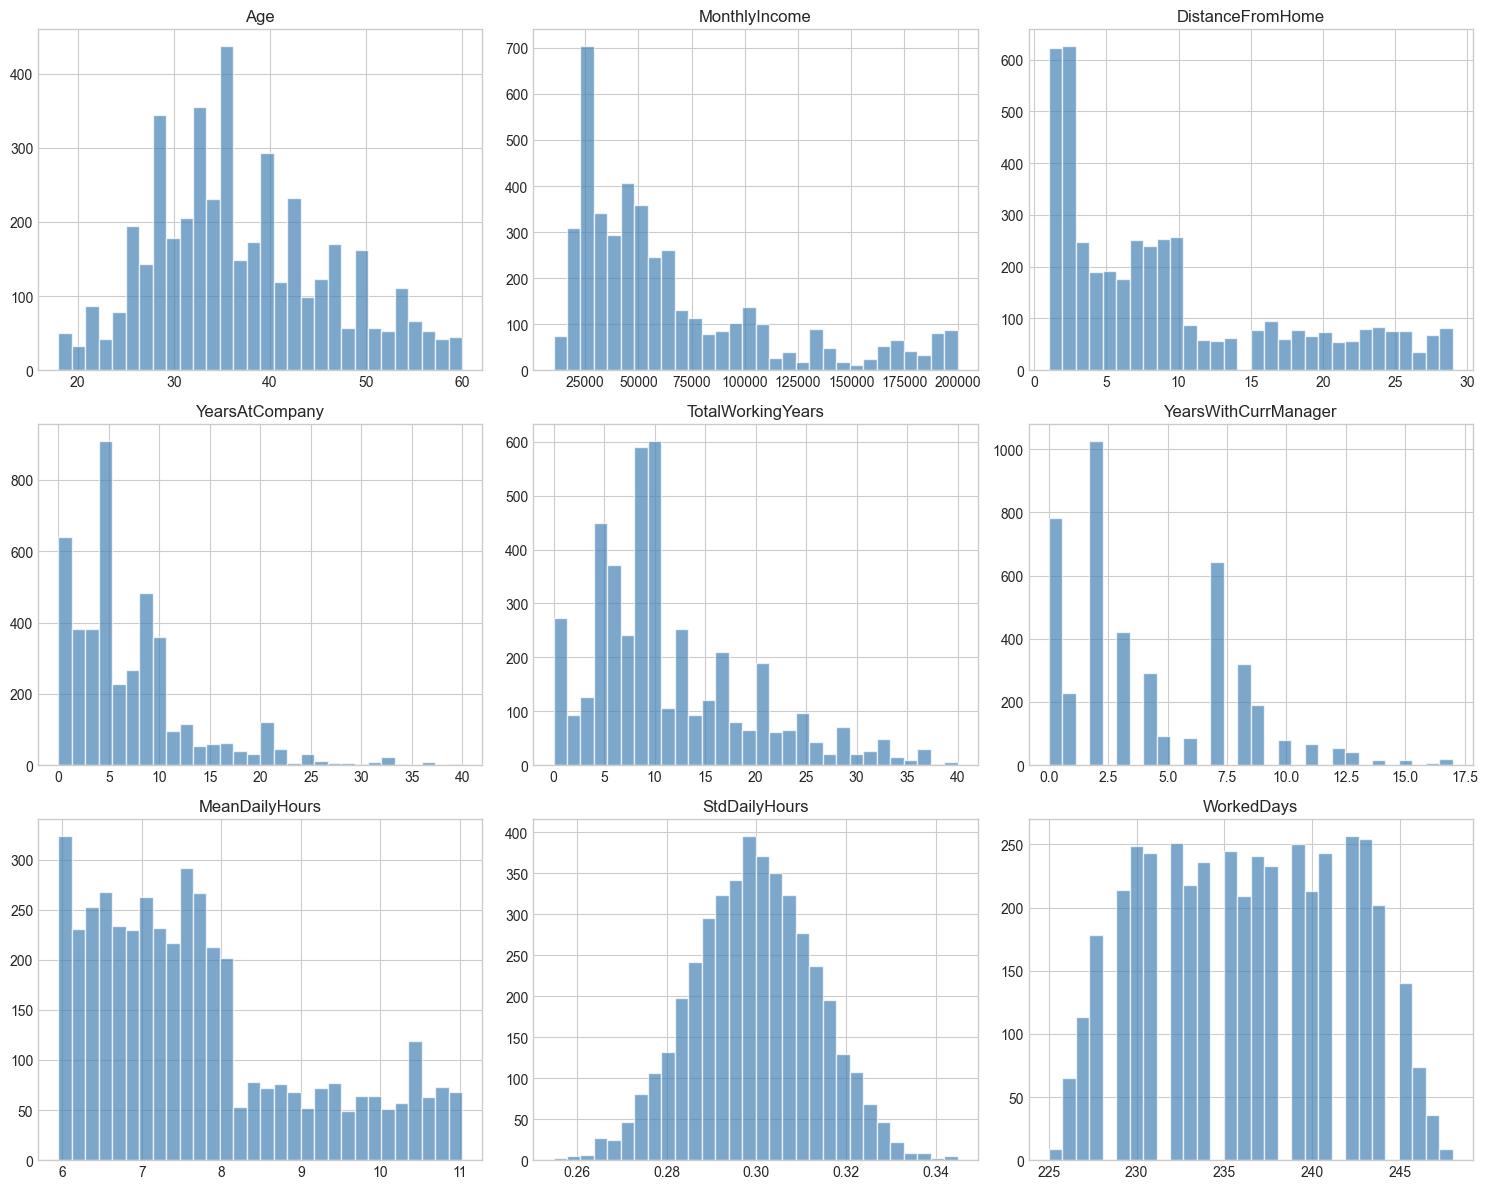

In [20]:
# Histogrammes des variables numériques clés
key_numerical = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'YearsAtCompany',
                 'TotalWorkingYears', 'YearsWithCurrManager', 'MeanDailyHours',
                 'StdDailyHours', 'WorkedDays']
key_numerical = [c for c in key_numerical if c in df.columns]

if len(key_numerical)>0:
    n_cols = 3
    n_rows = (len(key_numerical) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.flatten()
    for i, col in enumerate(key_numerical):
        ax = axes[i]
        df[col].hist(bins=30, ax=ax, color='steelblue', edgecolor='white', alpha=0.7)
        ax.set_title(col)
    for j in range(len(key_numerical), len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()
else:
    print('Aucune variable numérique clé trouvée pour les histogrammes')

# 17. Analyse des Corrélations

**Objectif :**
Détecter les liens linéaires : "Quand X augmente, est-ce que Y augmente aussi ?"

**Détail du Code et Variables :**
- `corr()` : Calcule le coefficient de corrélation (entre -1 et 1).
- `heatmap` : Affiche ces chiffres sous forme de couleurs (Rouge = forte corrélation positive, Bleu = négative).
- `attr_corr` : On isole la colonne 'Attrition' pour voir quelles variables font partir les gens (corrélation positive) ou rester (négative).

**Résultat attendu :**
Identification des facteurs clés (ex: Âge, Salaire) qui influencent le départ.

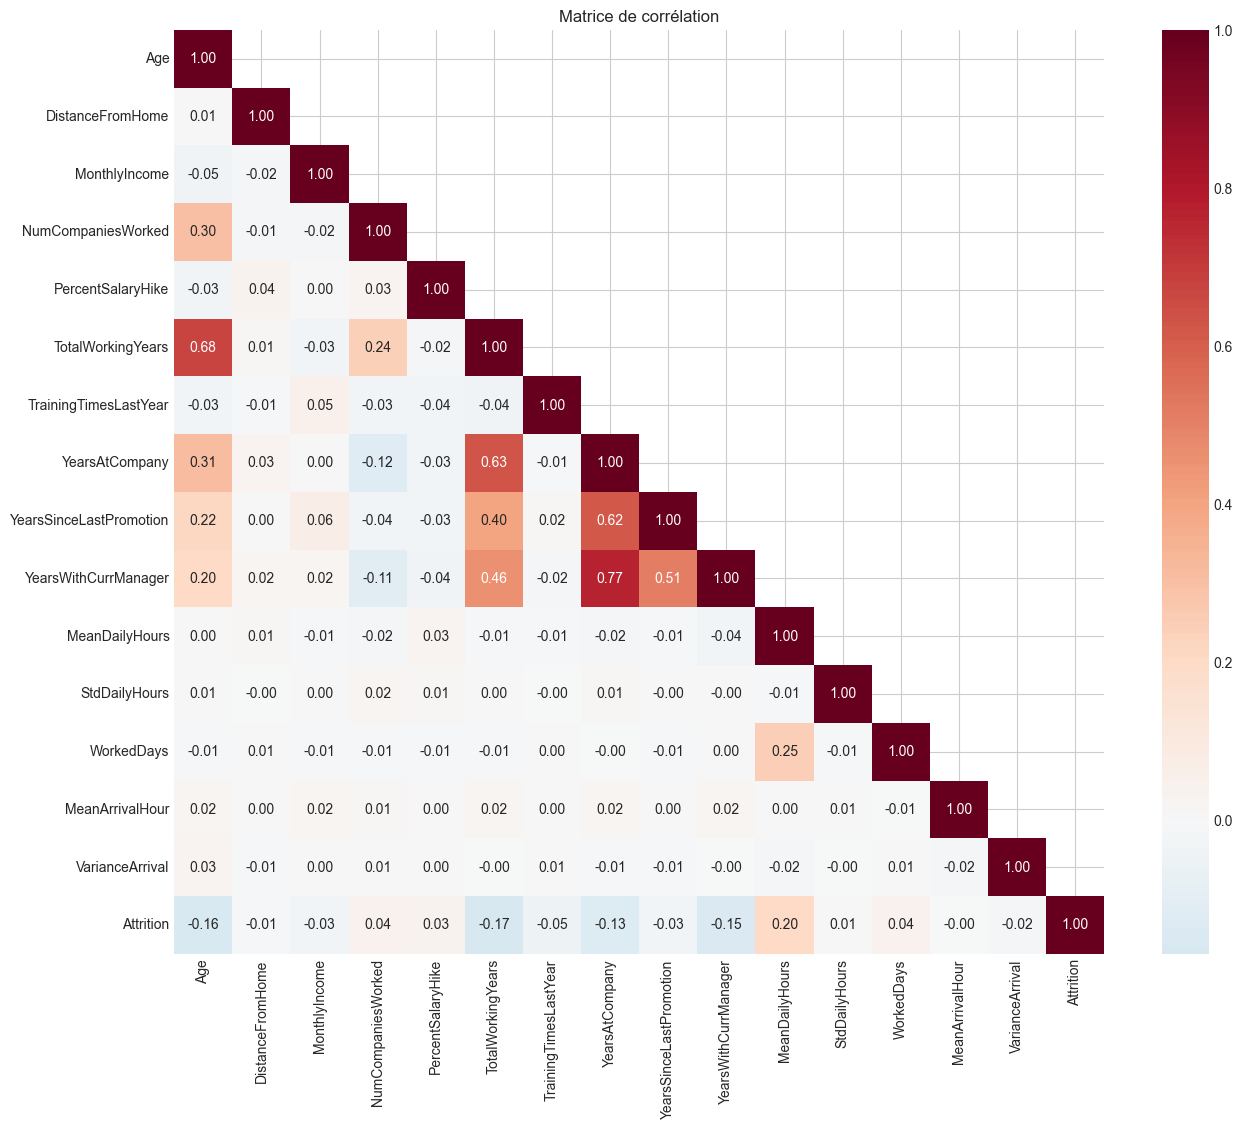

Top corrélations avec Attrition:


MeanDailyHours             0.199
TotalWorkingYears          0.170
Age                        0.158
YearsWithCurrManager       0.155
YearsAtCompany             0.133
TrainingTimesLastYear      0.048
NumCompaniesWorked         0.043
WorkedDays                 0.042
PercentSalaryHike          0.033
YearsSinceLastPromotion    0.031
Name: Attrition, dtype: float64

In [21]:
# Heatmap de corrélation (incluant Attrition)
corr_cols = [c for c in (numerical_cols + ['Attrition']) if c in df.columns]
if len(corr_cols) > 1:
    corr_matrix = df[corr_cols].corr()
    plt.figure(figsize=(15,12))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', center=0)
    plt.title('Matrice de corrélation')
    plt.show()
    attr_corr = corr_matrix['Attrition'].drop('Attrition').abs().sort_values(ascending=False)
    print('Top corrélations avec Attrition:')
    display(attr_corr.head(10).round(3))
else:
    print('Pas assez de colonnes numériques pour calculer la corrélation')

# 18. Analyse Bi-variée et Catégorielle

**Objectif :**
Comprendre qui part le plus selon son profil (Job, Statut Marital).

**Détail du Code et Variables :**
- **Barplots** : Calcule le taux de départ moyen (`mean()`) pour chaque catégorie (ex: Vendeurs vs Directeurs). La ligne rouge représente la moyenne globale pour comparer.
- **Boxplots** : Compare la distribution d'une variable (ex: Âge) entre ceux qui partent (Rouge) et ceux qui restent (Vert). Si les boîtes sont décalées, la variable est discriminante.

**Résultat attendu :**
Insights métier (ex: "Les célibataires partent 2x plus que les mariés", "Les jeunes partent plus que les seniors").

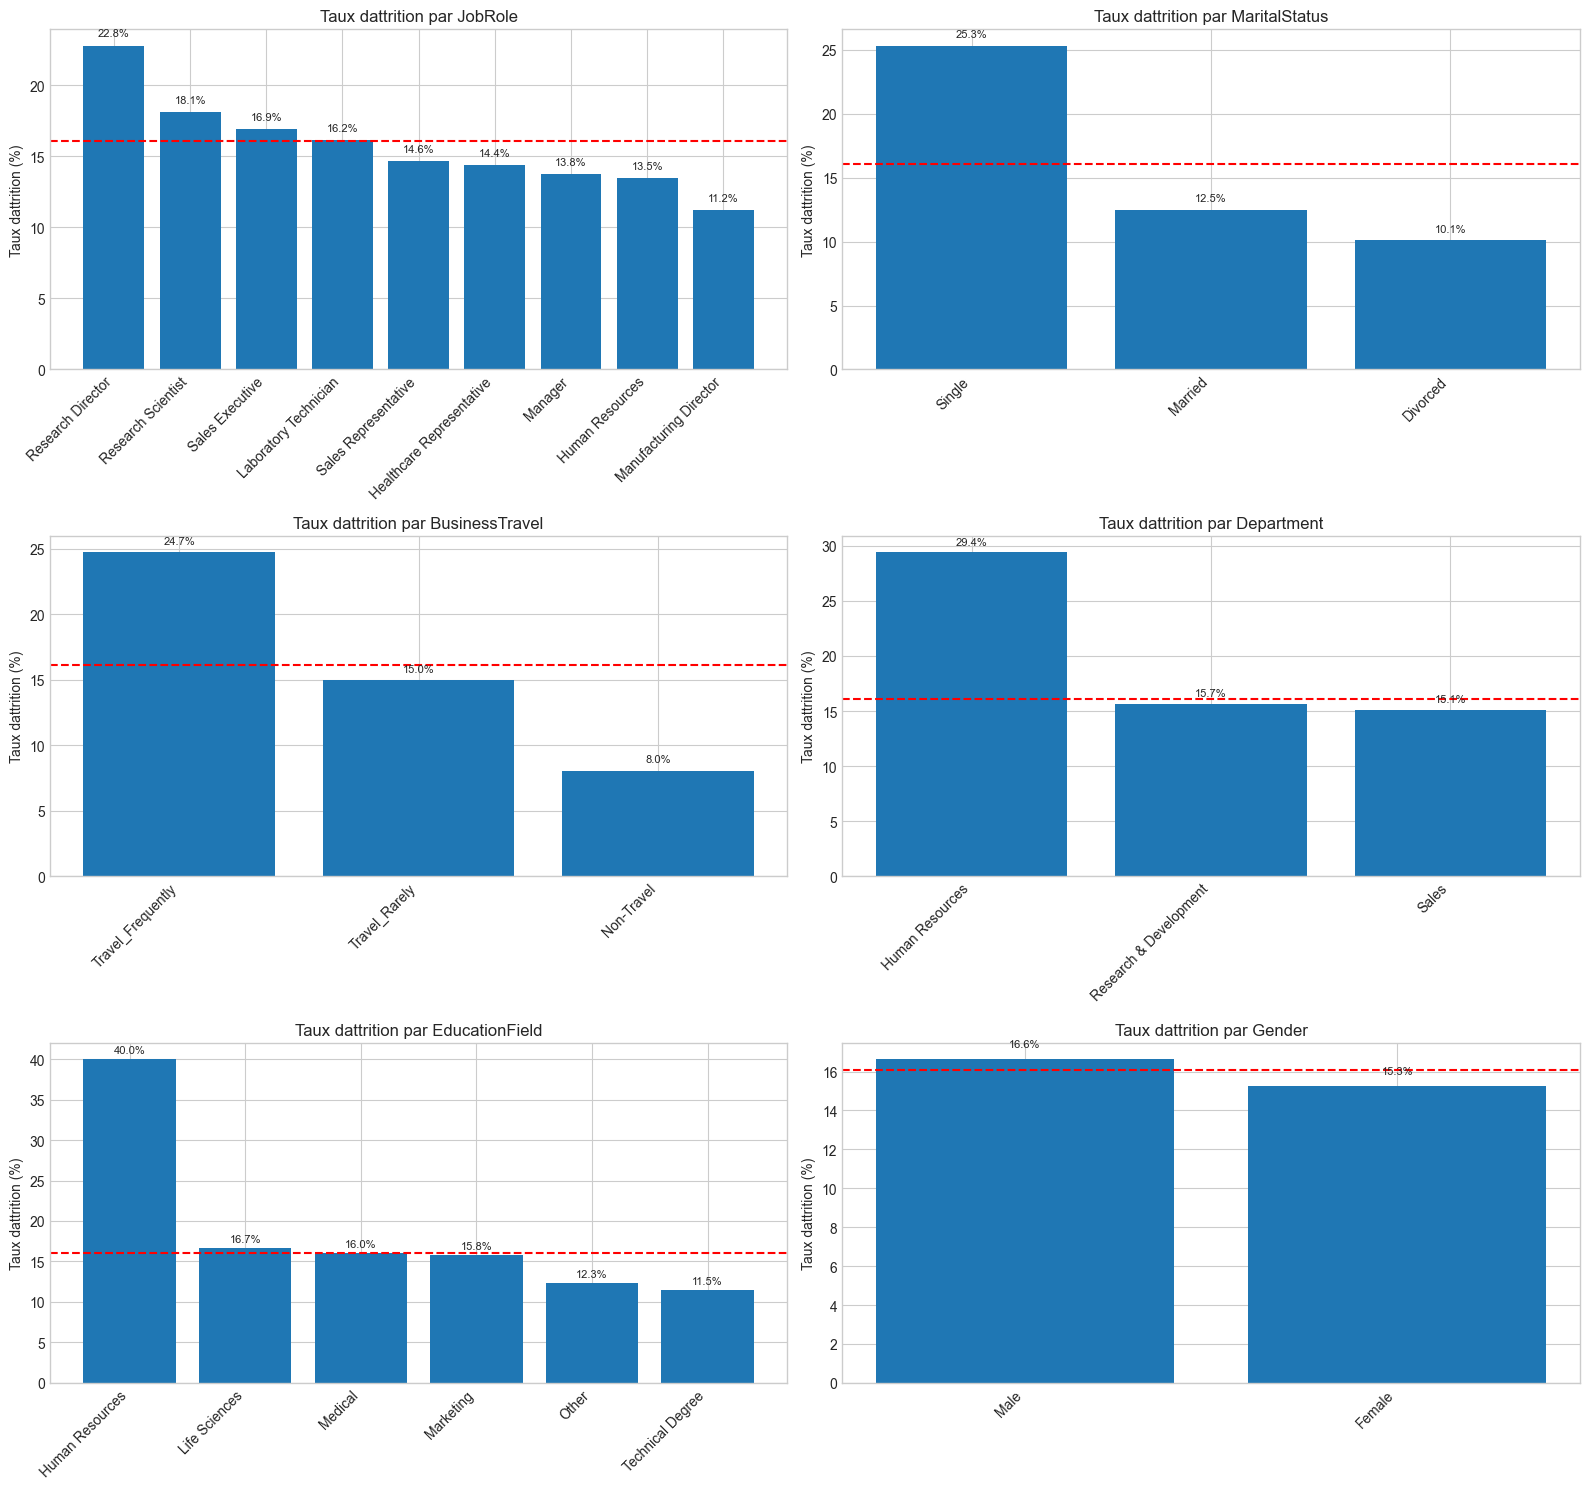

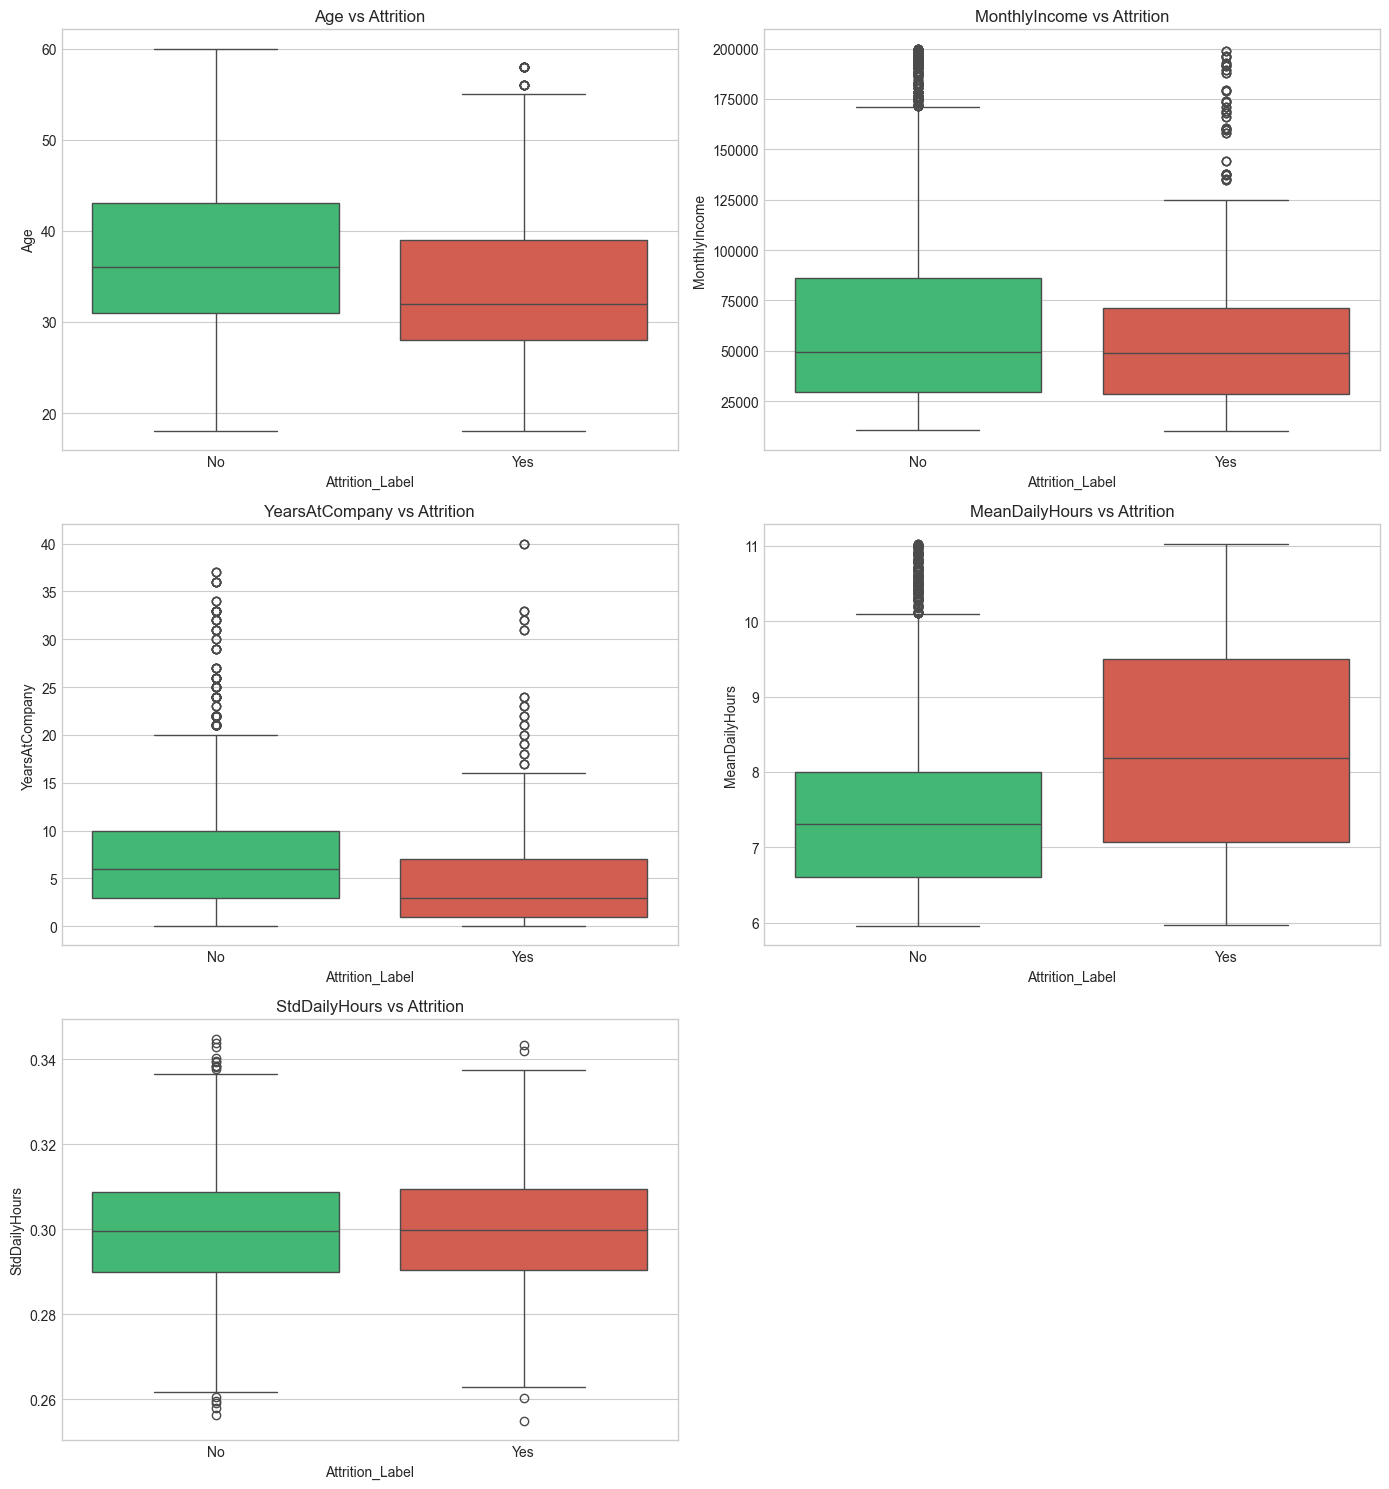

In [22]:
# Barplot du taux d'attrition par JobRole (et autres catégories) + Boxplots
categorical_vars = ['JobRole', 'MaritalStatus', 'BusinessTravel', 'Department', 'EducationField', 'Gender']
categorical_vars = [c for c in categorical_vars if c in df.columns]
if len(categorical_vars)>0:
    n_plots = len(categorical_vars)
    n_cols_plot = 2
    n_rows_plot = (n_plots + n_cols_plot - 1) // n_cols_plot
    fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(16, 5*n_rows_plot))
    axes = axes.flatten()
    for i, col in enumerate(categorical_vars):
        ax = axes[i]
        rates = df.groupby(col)['Attrition'].mean() * 100
        rates = rates.sort_values(ascending=False)
        bars = ax.bar(range(len(rates)), rates.values, color='tab:blue')
        ax.set_xticks(range(len(rates)))
        ax.set_xticklabels(rates.index, rotation=45, ha='right')
        ax.set_ylabel('Taux dattrition (%)')
        ax.set_title(f'Taux dattrition par {col}')
        ax.axhline(y=df['Attrition'].mean()*100, color='red', linestyle='--')
        for bar, val in zip(bars, rates.values):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()+0.5, f'{val:.1f}%', ha='center', va='bottom', fontsize=8)
    for j in range(n_plots, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()
else:
    print('Aucune variable catégorielle sélectionnée pour les barplots')

# Boxplots pour quelques variables numériques vs Attrition
vars_box = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'MeanDailyHours', 'StdDailyHours']
vars_box = [c for c in vars_box if c in df.columns]
if len(vars_box)>0:
    df_plot = df.copy()
    df_plot['Attrition_Label'] = df_plot['Attrition'].map({0: 'No', 1: 'Yes'})
    n_plots = len(vars_box)
    n_cols_plot = 2
    n_rows_plot = (n_plots + n_cols_plot - 1) // n_cols_plot
    fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(14, 5*n_rows_plot))
    axes = axes.flatten()
    palette = {'No':'#2ecc71', 'Yes':'#e74c3c'}
    for i, col in enumerate(vars_box):
        ax = axes[i]
        sns.boxplot(data=df_plot, x='Attrition_Label', y=col, ax=ax, palette=palette)
        ax.set_title(f'{col} vs Attrition')
    for j in range(n_plots, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()
else:
    print('Aucune variable numérique sélectionnée pour les boxplots')

# 19. Analyse du Déséquilibre de Classe

**Objectif :**
Quantifier la difficulté du problème de prédiction.

**Détail du Code et Variables :**
- `value_counts()` : Compte combien de 0 (Restent) et de 1 (Partent).
- `Pie chart` : Affiche ces proportions en camembert.
- **Signification** : Si on a 85% de "No" et 15% de "Yes", l'IA pourrait être tentée de toujours dire "No" pour avoir 85% de réussite. Il faudra surveiller cela.

**Résultat attendu :**
Confirmation visuelle du déséquilibre (généralement peu de départs).

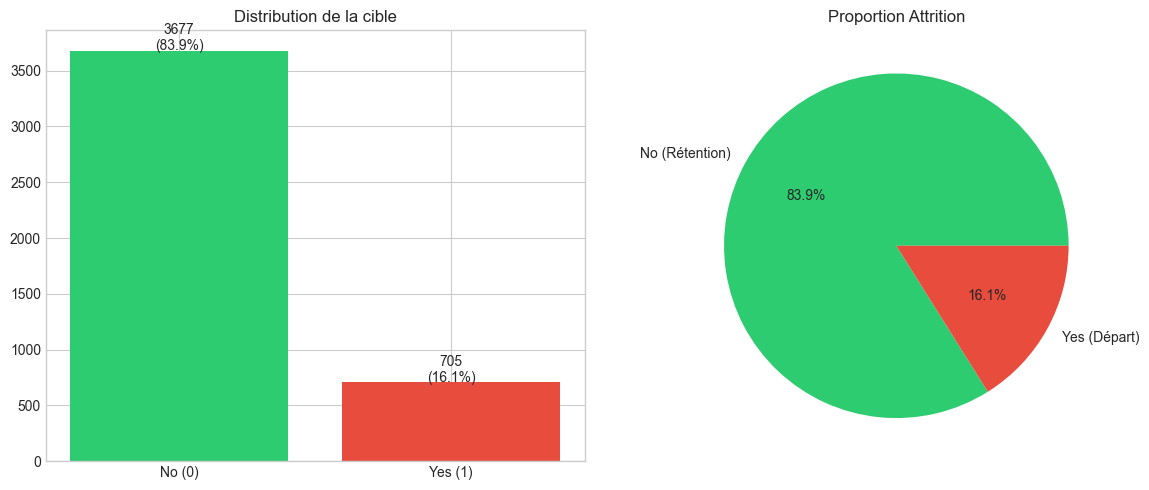

Ratio No/Yes: 5.22:1


In [23]:
# Analyse du déséquilibre de classe
counts = df['Attrition'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].bar(['No (0)', 'Yes (1)'], counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Distribution de la cible')
for i, v in enumerate(counts.values):
    pct = v / len(df) * 100
    axes[0].text(i, v + 5, f'{v}\n({pct:.1f}%)', ha='center')

axes[1].pie(counts.values, labels=['No (Rétention)', 'Yes (Départ)'], autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'])
axes[1].set_title('Proportion Attrition')
plt.tight_layout()
plt.show()

ratio = counts.iloc[0] / counts.iloc[1] if counts.iloc[1] > 0 else np.nan
print(f'Ratio No/Yes: {ratio:.2f}:1')

# 20. Conclusion et Sauvegarde

**Objectif :**
Finaliser le travail et enregistrer les fichiers propres pour l'étape suivante (Modélisation).

**Détail du Code et Variables :**
- `to_csv(..., index=False)` : Sauvegarde le DataFrame propre sur le disque sans la colonne d'index inutile.
- `joblib.dump` : Sauvegarde "l'intelligence" du preprocessor pour pouvoir réutiliser exactement les mêmes règles de transformation sur de nouvelles données futures.

**Résultat attendu :**
Message de succès. Les fichiers `.csv` et `.joblib` apparaissent dans le dossier du projet.

In [24]:
# Conclusion et sauvegarde
print('Résumé rapide :')
print(f" - Dataset final: {df.shape[0]} lignes, {df.shape[1]} colonnes")
print(f" - Variables numériques: {len(numerical_cols)}")
print(f" - Variables catégorielles: {len(ordinal_cols) + len(nominal_cols)}")

# Afficher les top facteurs corrélés si calculés
try:
    print('\nTop facteurs corrélés à l\'attrition:')
    display(attr_corr.head(5).round(3))
except Exception:
    pass

# Distribution de la cible
counts = df['Attrition'].value_counts()
print('\nDistribution de la cible:')
print(counts)
if counts.size >= 2 and counts.iloc[1] > 0:
    ratio = counts.iloc[0] / counts.iloc[1]
    print(f"Ratio No/Yes: {ratio:.2f}:1")
else:
    print('Ratio non calculable')

# Sauvegardes
print('\nSauvegarde du DataFrame nettoyé...')
df.to_csv('data_project_ia_merged_cleaned.csv', index=False)
print(' -> data_project_ia_merged_cleaned.csv')

# Sauvegarder le preprocessor (si présent)
try:
    import joblib
    joblib.dump(preprocessor, 'preprocessor.joblib')
    print(' -> preprocessor.joblib sauvegardé')
except Exception as e:
    print(f"Impossible d'enregistrer le preprocessor: {e}")

# Sauvegarder les matrices prétraitées (optionnel)
try:
    np.save('X_train_processed.npy', X_train_processed)
    np.save('X_test_processed.npy', X_test_processed)
    print(' -> X_train_processed.npy, X_test_processed.npy sauvegardés')
except Exception as e:
    print(f"Impossible d'enregistrer les matrices prétraitées: {e}")

print('\n Conclusion et sauvegardes terminées.')

Résumé rapide :
 - Dataset final: 4382 lignes, 31 colonnes
 - Variables numériques: 15
 - Variables catégorielles: 14

Top facteurs corrélés à l'attrition:


MeanDailyHours          0.199
TotalWorkingYears       0.170
Age                     0.158
YearsWithCurrManager    0.155
YearsAtCompany          0.133
Name: Attrition, dtype: float64


Distribution de la cible:
Attrition
0    3677
1     705
Name: count, dtype: int64
Ratio No/Yes: 5.22:1

Sauvegarde du DataFrame nettoyé...
 -> data_project_ia_merged_cleaned.csv
 -> preprocessor.joblib sauvegardé
 -> X_train_processed.npy, X_test_processed.npy sauvegardés

 Conclusion et sauvegardes terminées.


## Application des modèles

### 1. Régerssion Logistique

### Rappel de la Régression Logistique

La régression logistique est une technique statistique utilisée pour modéliser la probabilité qu'un événement binaire (avec deux issues possibles) se produise. Contrairement à la régression linéaire, qui prédit une valeur continue, la régression logistique prédit la probabilité d'une occurrence d'un événement.

#### Formulation Mathématique

La régression logistique utilise la fonction logistique ou sigmoïde pour transformer la sortie de la régression linéaire en une probabilité.

La fonction logistique est définie comme suit :
$\sigma(z) = \frac{1}{1 + e^{-z}}$

En régression logistique, \( z \) est une combinaison linéaire des caractéristiques :
$z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n$

Où :
- $\beta_0$ est l'ordonnée à l'origine (intercept)
- $\beta_1, \beta_2, \ldots, \beta_n$ sont les coefficients des caractéristiques $x_1, x_2, \ldots, x_n $

La probabilité que l'événement se produise (par exemple, \( y = 1 \)) est alors donnée par :
$P(y=1|x) = \sigma(z) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n)}}$

#### Fonction de Coût

La fonction de coût utilisée pour ajuster les paramètres de la régression logistique est la log-vraisemblance, définie comme suit :
$J(\beta) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right] $

Où :
- $m$ est le nombre d'échantillons
- $y^{(i)}$ est la valeur réelle pour l'échantillon $i$
- $\hat{y}^{(i)}$ est la probabilité prédite pour l'échantillon $i$

#### Entraînement du Modèle

L'entraînement du modèle de régression logistique consiste à trouver les paramètres $\beta$ qui minimisent la fonction de coût. Ceci est généralement fait à l'aide de l'algorithme de descente de gradient.



 ===== 1. RÉGRESSION LOGISTIQUE =====

Entraînement du modèle...
✓ Modèle entraîné!

Accuracy (Exactitude): 0.8495 (84.95%)

Matrice de Confusion (Régression Logistique):
[[713  23]
 [109  32]]
  TN (Vrais Négatifs): 713
  FP (Faux Positifs): 23
  FN (Faux Négatifs): 109
  TP (Vrais Positifs): 32

Rapport de Classification (Régression Logistique):
              precision    recall  f1-score   support

No Attrition       0.87      0.97      0.92       736
   Attrition       0.58      0.23      0.33       141

    accuracy                           0.85       877
   macro avg       0.72      0.60      0.62       877
weighted avg       0.82      0.85      0.82       877

AUC-ROC Score: 0.8004



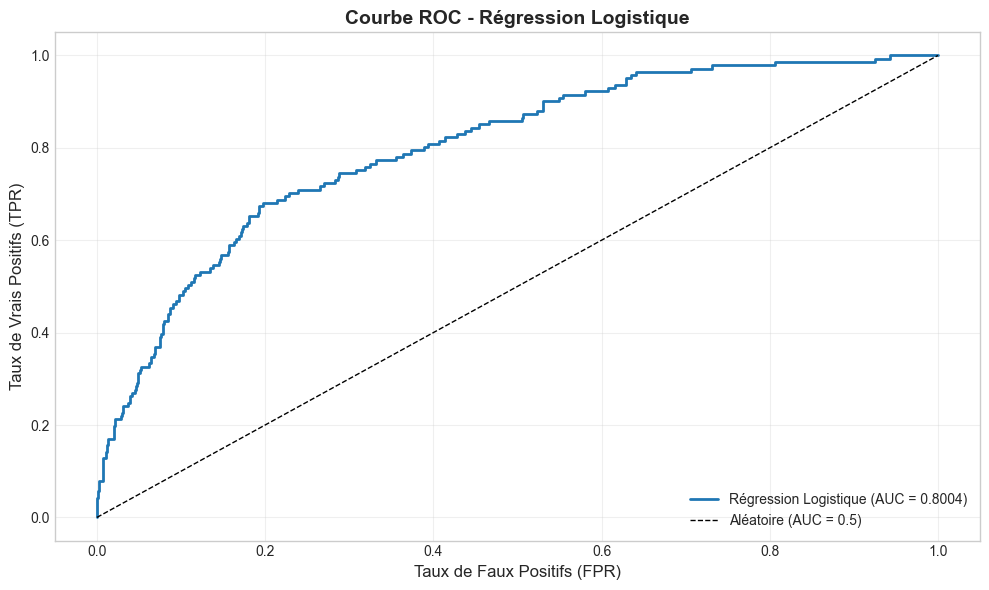

In [25]:
# Import des librairies nécessaires
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score

print(' ===== 1. RÉGRESSION LOGISTIQUE =====')
print()

# Initialisation et entraînement du modèle avec les données prétraitées
log_reg = LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs')
print('Entraînement du modèle...')
log_reg.fit(X_train_processed, y_train)
print('✓ Modèle entraîné!')
print()

# Prédictions sur l'ensemble de test
y_pred_log_reg = log_reg.predict(X_test_processed)
y_pred_proba_log_reg = log_reg.predict_proba(X_test_processed)[:, 1]  # Probabilités pour la classe 1

# Calcul de l'exactitude (accuracy)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'Accuracy (Exactitude): {accuracy_log_reg:.4f} ({accuracy_log_reg*100:.2f}%)')
print()

# Matrice de confusion
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print('Matrice de Confusion (Régression Logistique):')
print(conf_matrix_log_reg)
print(f'  TN (Vrais Négatifs): {conf_matrix_log_reg[0,0]}')
print(f'  FP (Faux Positifs): {conf_matrix_log_reg[0,1]}')
print(f'  FN (Faux Négatifs): {conf_matrix_log_reg[1,0]}')
print(f'  TP (Vrais Positifs): {conf_matrix_log_reg[1,1]}')
print()

# Rapport de classification
print('Rapport de Classification (Régression Logistique):')
print(classification_report(y_test, y_pred_log_reg, target_names=['No Attrition', 'Attrition']))

# AUC-ROC (utilisant les probabilités)
roc_auc_log_reg = roc_auc_score(y_test, y_pred_proba_log_reg)
print(f'AUC-ROC Score: {roc_auc_log_reg:.4f}')
print()

# Courbe ROC
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_pred_proba_log_reg)

plt.figure(figsize=(10, 6))
plt.plot(fpr_log_reg, tpr_log_reg, linewidth=2, label=f'Régression Logistique (AUC = {roc_auc_log_reg:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Aléatoire (AUC = 0.5)')
plt.xlabel('Taux de Faux Positifs (FPR)', fontsize=12)
plt.ylabel('Taux de Vrais Positifs (TPR)', fontsize=12)
plt.title('Courbe ROC - Régression Logistique', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### 2. Perceptron

### Rappel du Perceptron

Le perceptron est l'un des algorithmes de classification supervisée les plus simples et les plus anciens, introduit par Frank Rosenblatt en 1957. C'est une unité de traitement élémentaire d'un réseau de neurones, souvent utilisée pour les tâches de classification binaire. Le perceptron est basé sur une combinaison linéaire des caractéristiques d'entrée et utilise une fonction de seuil pour produire une sortie binaire.

#### Formulation Mathématique

Le perceptron calcule une somme pondérée des caractéristiques d'entrée et applique une fonction de seuil pour déterminer la classe prédite.

La sortie du perceptron est définie comme suit :
$\hat{y} = \begin{cases} 
1 & \text{si } z \geq 0 \\
0 & \text{si } z < 0 
\end{cases} $

Où :
$z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n$

Ici, $\beta_0$ est le biais (ou l'ordonnée à l'origine), et $\beta_1, \beta_2, \ldots, \beta_n$ sont les poids des caractéristiques $x_1, x_2, \ldots, x_n$.

#### Algorithme d'Apprentissage

L'algorithme d'apprentissage du perceptron ajuste les poids en fonction des erreurs de classification. Pour chaque échantillon d'entraînement $(x^{(i)}, y^{(i)})$, où $y^{(i)}$ est la classe réelle :

1. Calculer la sortie prédite :
$\hat{y}^{(i)} = \begin{cases} 
1 & \text{si } z \geq 0 \\
0 & \text{si } z < 0 
\end{cases}$

2. Mettre à jour les poids si la prédiction est incorrecte :
$\beta_j = \beta_j + \eta (y^{(i)} - \hat{y}^{(i)}) x_j^{(i)}$
Où $\eta$ est le taux d'apprentissage.

#### Fonction de Coût

Le perceptron n'utilise pas une fonction de coût au sens traditionnel comme la régression logistique. Les poids sont mis à jour directement en fonction des erreurs de classification.


 ===== 2. PERCEPTRON =====

Entraînement du modèle...
✓ Modèle entraîné!

Accuracy (Exactitude): 0.8062 (80.62%)

Matrice de Confusion (Perceptron):
[[657  79]
 [ 91  50]]
  TN (Vrais Négatifs): 657
  FP (Faux Positifs): 79
  FN (Faux Négatifs): 91
  TP (Vrais Positifs): 50

Rapport de Classification (Perceptron):
              precision    recall  f1-score   support

No Attrition       0.88      0.89      0.89       736
   Attrition       0.39      0.35      0.37       141

    accuracy                           0.81       877
   macro avg       0.63      0.62      0.63       877
weighted avg       0.80      0.81      0.80       877

AUC-ROC Score: 0.7397



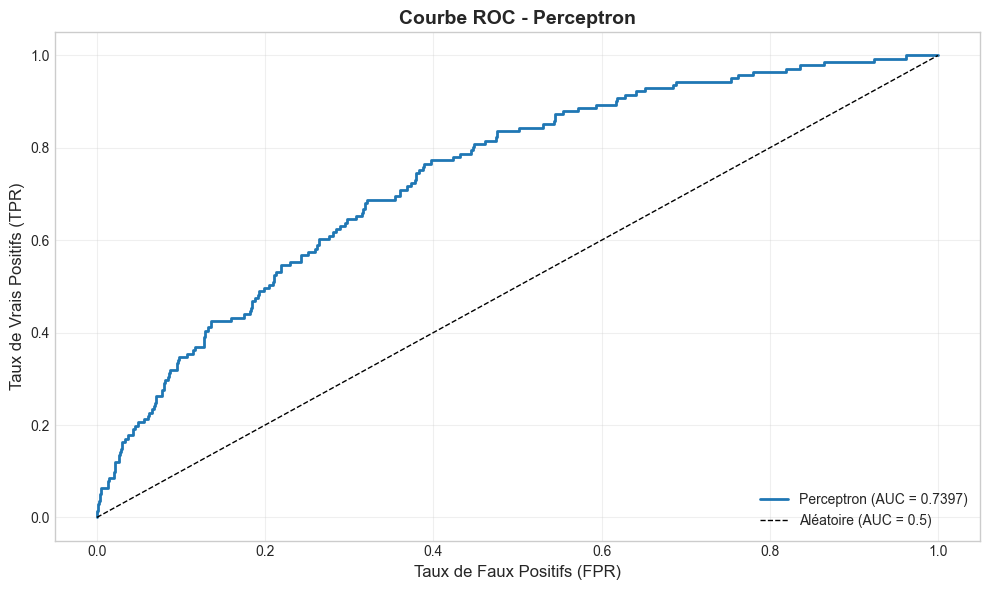

In [27]:
# Import des librairies nécessaires
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

print(' ===== 2. PERCEPTRON =====')
print()

# Initialisation et entraînement du modèle
# Note: Le Perceptron est un algorithme linéaire simple.
perceptron = Perceptron(max_iter=1000, random_state=42, eta0=1.0)
print('Entraînement du modèle...')
perceptron.fit(X_train_processed, y_train)
print('✓ Modèle entraîné!')
print()

# Prédictions sur l'ensemble de test
y_pred_perceptron = perceptron.predict(X_test_processed)

# Note: Le Perceptron ne fournit pas de probabilités (predict_proba). 
# On utilise decision_function pour avoir un "score" de confiance pour la courbe ROC.
y_score_perceptron = perceptron.decision_function(X_test_processed)

# Calcul de l'exactitude (accuracy)
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
print(f'Accuracy (Exactitude): {accuracy_perceptron:.4f} ({accuracy_perceptron*100:.2f}%)')
print()

# Matrice de confusion
conf_matrix_perceptron = confusion_matrix(y_test, y_pred_perceptron)
print('Matrice de Confusion (Perceptron):')
print(conf_matrix_perceptron)
print(f'  TN (Vrais Négatifs): {conf_matrix_perceptron[0,0]}')
print(f'  FP (Faux Positifs): {conf_matrix_perceptron[0,1]}')
print(f'  FN (Faux Négatifs): {conf_matrix_perceptron[1,0]}')
print(f'  TP (Vrais Positifs): {conf_matrix_perceptron[1,1]}')
print()

# Rapport de classification
print('Rapport de Classification (Perceptron):')
print(classification_report(y_test, y_pred_perceptron, target_names=['No Attrition', 'Attrition']))

# AUC-ROC
roc_auc_perceptron = roc_auc_score(y_test, y_score_perceptron)
print(f'AUC-ROC Score: {roc_auc_perceptron:.4f}')
print()

# Courbe ROC
fpr_perceptron, tpr_perceptron, thresholds_perceptron = roc_curve(y_test, y_score_perceptron)

plt.figure(figsize=(10, 6))
plt.plot(fpr_perceptron, tpr_perceptron, linewidth=2, label=f'Perceptron (AUC = {roc_auc_perceptron:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Aléatoire (AUC = 0.5)')
plt.xlabel('Taux de Faux Positifs (FPR)', fontsize=12)
plt.ylabel('Taux de Vrais Positifs (TPR)', fontsize=12)
plt.title('Courbe ROC - Perceptron', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### 3. Support Vector Machine (SVM)

### Rappel du Support Vector Machine (SVM)

Les Support Vector Machines (SVM) sont des modèles de classification supervisée utilisés pour les tâches de classification et de régression. Les SVM cherchent à trouver un hyperplan optimal qui sépare les différentes classes dans l'espace des caractéristiques.

#### Principe de Fonctionnement

Le SVM fonctionne en trouvant l'hyperplan qui maximise la marge de séparation entre les différentes classes. La marge est définie comme la distance entre l'hyperplan et les points de données les plus proches de chaque classe, appelés vecteurs de support.

Dans un problème de classification binaire, l'hyperplan est défini par l'équation :

$\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n = 0$

#### Maximisation de la Marge

L'objectif du SVM est de maximiser la marge, ce qui se traduit par la résolution du problème d'optimisation suivant :

$\text{Minimiser} \ \frac{1}{2} \|\beta\|^2$

Sous les contraintes :

$y^{(i)} (\beta_0 + \beta_1 x_1^{(i)} + \beta_2 x_2^{(i)} + \ldots + \beta_n x_n^{(i)}) \geq 1 \ \text{pour tous les} \ i $

#### Fonction de Coût et Régularisation

Pour les données non linéairement séparables, les SVM utilisent une méthode appelée "soft margin" qui permet certaines erreurs de classification en ajoutant des variables de relâchement (slack variables) dans la fonction de coût :

$ \text{Minimiser} \ \frac{1}{2} \|\beta\|^2 + C \sum_{i=1}^{m} \xi_i $

Sous les contraintes :

$y^{(i)} (\beta_0 + \beta_1 x_1^{(i)} + \beta_2 x_2^{(i)} + \ldots + \beta_n x_n^{(i)}) \geq 1 - \xi_i $

$\xi_i \geq 0 \ \text{pour tous les} \ i $

Où $ \xi_i $ sont les variables de relâchement et $ C $ est un paramètre de régularisation qui contrôle l'équilibre entre maximiser la marge et minimiser les erreurs de classification.

#### Noyaux (Kernels)

Pour les problèmes non linéaires, les SVM peuvent utiliser des fonctions noyau (kernels) pour transformer les données dans un espace de caractéristiques de dimension supérieure où un hyperplan linéaire peut être trouvé. Les noyaux couramment utilisés incluent :
- Noyau linéaire
- Noyau polynomial
- Noyau radial de base (RBF)
- Noyau sigmoïde

#### Avantages et Inconvénients

##### Avantages :
- Efficace dans les espaces de haute dimension
- Utilise un sous-ensemble des points d'entraînement (vecteurs de support) pour la fonction de décision, ce qui le rend efficace en termes de mémoire
- Flexible grâce à l'utilisation de différentes fonctions noyau

##### Inconvénients :
- Performance sensible au choix des hyperparamètres et du noyau
- Complexité de l'entraînement augmente avec la taille du jeu de données
- Interprétation des résultats moins intuitive que pour certains autres modèles

Le SVM est un algorithme puissant et flexible pour les tâches de classification, particulièrement utile dans les problèmes où les données ne sont pas linéairement séparables.


 ===== 3. SVM (Support Vector Machine) =====

Entraînement du modèle SVM (cela peut prendre quelques secondes)...
✓ Modèle entraîné!

Accuracy (Exactitude): 0.8837 (88.37%)

Matrice de Confusion (SVM):
[[730   6]
 [ 96  45]]
  TN (Vrais Négatifs): 730
  FP (Faux Positifs): 6
  FN (Faux Négatifs): 96
  TP (Vrais Positifs): 45

Rapport de Classification (SVM):
              precision    recall  f1-score   support

No Attrition       0.88      0.99      0.93       736
   Attrition       0.88      0.32      0.47       141

    accuracy                           0.88       877
   macro avg       0.88      0.66      0.70       877
weighted avg       0.88      0.88      0.86       877

AUC-ROC Score: 0.8786



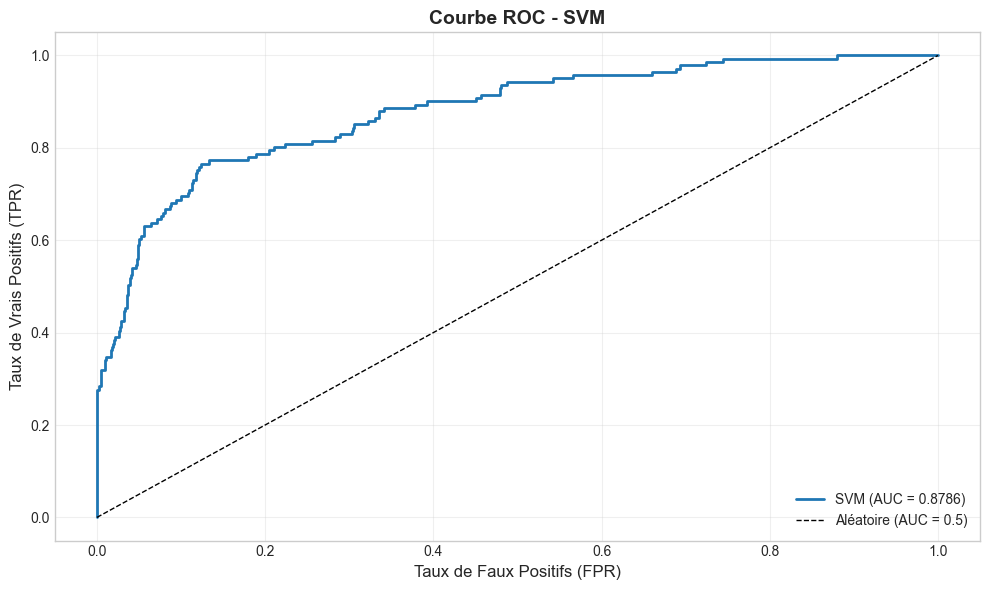

In [28]:
# Import des librairies nécessaires
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

print(' ===== 3. SVM (Support Vector Machine) =====')
print()

# Initialisation et entraînement du modèle
# probability=True est nécessaire pour calculer l'AUC-ROC et tracer la courbe
svm = SVC(probability=True, random_state=42)
print('Entraînement du modèle SVM (cela peut prendre quelques secondes)...')
svm.fit(X_train_processed, y_train)
print('✓ Modèle entraîné!')
print()

# Prédictions sur l'ensemble de test
y_pred_svm = svm.predict(X_test_processed)
y_pred_proba_svm = svm.predict_proba(X_test_processed)[:, 1]  # Probabilités pour la classe 1

# Calcul de l'exactitude (accuracy)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy (Exactitude): {accuracy_svm:.4f} ({accuracy_svm*100:.2f}%)')
print()

# Matrice de confusion
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print('Matrice de Confusion (SVM):')
print(conf_matrix_svm)
print(f'  TN (Vrais Négatifs): {conf_matrix_svm[0,0]}')
print(f'  FP (Faux Positifs): {conf_matrix_svm[0,1]}')
print(f'  FN (Faux Négatifs): {conf_matrix_svm[1,0]}')
print(f'  TP (Vrais Positifs): {conf_matrix_svm[1,1]}')
print()

# Rapport de classification
print('Rapport de Classification (SVM):')
print(classification_report(y_test, y_pred_svm, target_names=['No Attrition', 'Attrition']))

# AUC-ROC
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)
print(f'AUC-ROC Score: {roc_auc_svm:.4f}')
print()

# Courbe ROC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_svm)

plt.figure(figsize=(10, 6))
plt.plot(fpr_svm, tpr_svm, linewidth=2, label=f'SVM (AUC = {roc_auc_svm:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Aléatoire (AUC = 0.5)')
plt.xlabel('Taux de Faux Positifs (FPR)', fontsize=12)
plt.ylabel('Taux de Vrais Positifs (TPR)', fontsize=12)
plt.title('Courbe ROC - SVM', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### 4. Naive Bayès

### Rappel du Naive Bayes

Le Naive Bayes est une famille de classificateurs probabilistes basés sur l'application du théorème de Bayes avec une forte (naïve) hypothèse d'indépendance entre les caractéristiques. Il est particulièrement utile pour les grandes bases de données en raison de sa simplicité et de son efficacité computationnelle.

#### Principe de Fonctionnement

Le modèle Naive Bayes est basé sur le théorème de Bayes qui permet de calculer la probabilité d'une classe donnée un ensemble de caractéristiques. Le théorème de Bayes est exprimé comme suit :

$P(C_k | \mathbf{x}) = \frac{P(C_k) \cdot P(\mathbf{x} | C_k)}{P(\mathbf{x})}$

Où :
- $P(C_k | \mathbf{x})$ est la probabilité de la classe $C_k$ donnée les caractéristiques $\mathbf{x}$
- $P(C_k)$ est la probabilité a priori de la classe $C_k$
- $ P(\mathbf{x} | C_k) $ est la probabilité de $\mathbf{x}$ donnée la classe $ C_k $
- $ P(\mathbf{x}) $ est la probabilité de l'ensemble des caractéristiques $\mathbf{x} $

#### Hypothèse d'Indépendance

Le Naive Bayes fait l'hypothèse que les caractéristiques sont conditionnellement indépendantes les unes des autres, étant donné la classe :

$ P(\mathbf{x} | C_k) = \prod_{i=1}^{n} P(x_i | C_k) $

Cette hypothèse simplifie considérablement le calcul des probabilités et rend le modèle très efficace même avec un grand nombre de caractéristiques.

#### Types de Modèles Naive Bayes

Il existe plusieurs variantes du Naive Bayes en fonction du type de données :

- **Gaussian Naive Bayes** : Utilisé pour les caractéristiques continues et suppose que les caractéristiques suivent une distribution normale (gaussienne).
- **Multinomial Naive Bayes** : Utilisé pour les données discrètes, comme le comptage de mots dans le traitement du langage naturel.
- **Bernoulli Naive Bayes** : Utilisé pour les données binaires.

#### Fonction de Décision

Pour prédire la classe la plus probable pour un ensemble de caractéristiques, le Naive Bayes choisit la classe $ C_k $ qui maximise $ P(C_k | \mathbf{x}) $. En pratique, cela revient à choisir la classe qui maximise :

$ P(C_k) \cdot \prod_{i=1}^{n} P(x_i | C_k) $

#### Avantages et Inconvénients

##### Avantages :
- Simple à implémenter et très rapide à entraîner.
- Fonctionne bien avec des grands ensembles de données.
- Peu sensible aux données manquantes.
- Performant pour les problèmes de classification de texte et les systèmes de recommandation.

##### Inconvénients :
- L'hypothèse d'indépendance conditionnelle est souvent irréaliste dans les données réelles, ce qui peut affecter la précision du modèle.
- Ne prend pas en compte les interactions entre les caractéristiques.
- Les probabilités prédites peuvent être moins précises comparées à d'autres modèles de classification sophistiqués.

Le Naive Bayes est un algorithme de classification robuste et efficace, particulièrement adapté pour les applications où la rapidité et la simplicité sont essentielles.


 ===== 4. NAIVE BAYES (GaussianNB) =====

Entraînement du modèle Naive Bayes...
✓ Modèle entraîné!

Accuracy (Exactitude): 0.8005 (80.05%)

Matrice de Confusion (Naive Bayes):
[[648  88]
 [ 87  54]]
  TN (Vrais Négatifs): 648
  FP (Faux Positifs): 88
  FN (Faux Négatifs): 87
  TP (Vrais Positifs): 54

Rapport de Classification (Naive Bayes):
              precision    recall  f1-score   support

No Attrition       0.88      0.88      0.88       736
   Attrition       0.38      0.38      0.38       141

    accuracy                           0.80       877
   macro avg       0.63      0.63      0.63       877
weighted avg       0.80      0.80      0.80       877

AUC-ROC Score: 0.7120



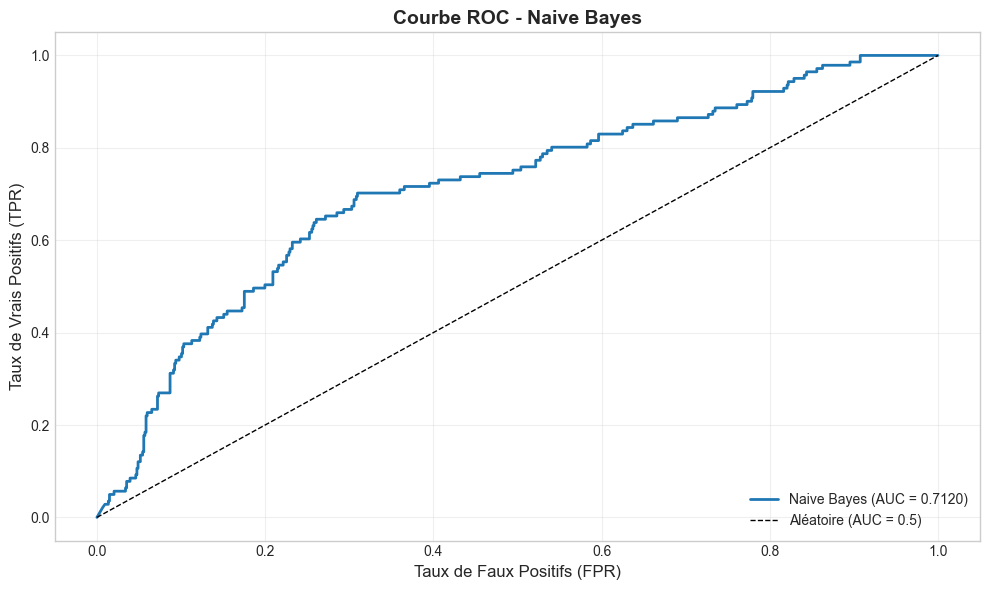

In [29]:
# Import des librairies nécessaires
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

print(' ===== 4. NAIVE BAYES (GaussianNB) =====')
print()

# Initialisation et entraînement du modèle
nb = GaussianNB()
print('Entraînement du modèle Naive Bayes...')
nb.fit(X_train_processed, y_train)
print('✓ Modèle entraîné!')
print()

# Prédictions sur l'ensemble de test
y_pred_nb = nb.predict(X_test_processed)
y_pred_proba_nb = nb.predict_proba(X_test_processed)[:, 1]  # Probabilités pour la classe 1

# Calcul de l'exactitude (accuracy)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy (Exactitude): {accuracy_nb:.4f} ({accuracy_nb*100:.2f}%)')
print()

# Matrice de confusion
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print('Matrice de Confusion (Naive Bayes):')
print(conf_matrix_nb)
print(f'  TN (Vrais Négatifs): {conf_matrix_nb[0,0]}')
print(f'  FP (Faux Positifs): {conf_matrix_nb[0,1]}')
print(f'  FN (Faux Négatifs): {conf_matrix_nb[1,0]}')
print(f'  TP (Vrais Positifs): {conf_matrix_nb[1,1]}')
print()

# Rapport de classification
print('Rapport de Classification (Naive Bayes):')
print(classification_report(y_test, y_pred_nb, target_names=['No Attrition', 'Attrition']))

# AUC-ROC
roc_auc_nb = roc_auc_score(y_test, y_pred_proba_nb)
print(f'AUC-ROC Score: {roc_auc_nb:.4f}')
print()

# Courbe ROC
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_proba_nb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_nb, tpr_nb, linewidth=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Aléatoire (AUC = 0.5)')
plt.xlabel('Taux de Faux Positifs (FPR)', fontsize=12)
plt.ylabel('Taux de Vrais Positifs (TPR)', fontsize=12)
plt.title('Courbe ROC - Naive Bayes', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### 5. Decision Trees

### Rappel des Arbres de Décision

Les arbres de décision sont des modèles de prédiction qui utilisent une structure d'arbre pour prendre des décisions basées sur des règles dérivées des caractéristiques des données. Ils sont largement utilisés pour les tâches de classification et de régression en raison de leur simplicité et de leur interprétabilité.

#### Principe de Fonctionnement

Un arbre de décision est constitué de nœuds de décision et de feuilles. Chaque nœud de décision représente une caractéristique des données, et chaque branche de ce nœud représente une valeur ou un intervalle de cette caractéristique. Les feuilles de l'arbre représentent les classes de sortie ou les valeurs de régression.

Le modèle divise de manière récursive les données en sous-ensembles basés sur les valeurs des caractéristiques, créant ainsi une structure en forme d'arbre. Le processus continue jusqu'à ce que tous les nœuds soient purs (c'est-à-dire qu'ils contiennent des instances d'une seule classe) ou qu'une condition d'arrêt soit atteinte.

#### Construction de l'Arbre

1. **Sélection de la Caractéristique** : À chaque nœud, le modèle sélectionne la caractéristique qui divise le mieux les données. Cela est généralement basé sur des critères comme la réduction de l'entropie ou la réduction de l'indice de Gini.
2. **Création de Nœuds** : Les données sont divisées en sous-ensembles basés sur la caractéristique sélectionnée, et des nœuds enfants sont créés pour chaque division.
3. **Répartition des Données** : Les sous-ensembles de données sont répartis entre les nœuds enfants, et le processus de sélection de la caractéristique se répète.
4. **Arrêt de la Division** : La division s'arrête lorsque tous les nœuds sont purs ou lorsqu'une condition d'arrêt prédéfinie est atteinte, comme une profondeur maximale de l'arbre ou un nombre minimal d'instances par nœud.

#### Critères de Sélection

- **Entropie et Gain d'Information** : L'entropie mesure le désordre dans les données. Le gain d'information est la réduction de l'entropie après la division des données.
- **Indice de Gini** : Mesure de l'impureté des données. Une valeur de 0 indique une pureté maximale, tandis qu'une valeur de 1 indique une impureté maximale.

#### Avantages et Inconvénients

##### Avantages :
- **Interprétabilité** : Les arbres de décision sont faciles à visualiser et à interpréter.
- **Pas de Prétraitement des Données** : Peuvent gérer des données numériques et catégoriques sans nécessiter de prétraitement.
- **Manipulation des Données Manquantes** : Peut gérer des valeurs manquantes en utilisant des mécanismes comme la pondération des chemins de décision.
- **Robustesse** : Peuvent capturer des interactions non linéaires entre les caractéristiques.

##### Inconvénients :
- **Surapprentissage** : Les arbres de décision peuvent facilement surapprendre les données d'entraînement, surtout lorsqu'ils sont profonds.
- **Variance Élevée** : Sensibles aux variations dans les données d'entraînement. Des changements mineurs peuvent entraîner des arbres complètement différents.
- **Biais** : Tendent à privilégier les caractéristiques avec de nombreuses valeurs distinctes.

#### Applications

- **Classification** : Attribution de classes à des instances basées sur leurs caractéristiques.
- **Régression** : Prédiction de valeurs continues.
- **Analyse Exploratoire** : Identification des caractéristiques importantes et des relations entre les caractéristiques et les classes de sortie.

Les arbres de décision sont un outil puissant pour la modélisation prédictive, offrant une combinaison de simplicité, d'interprétabilité et de flexibilité.


 ===== 5. DECISION TREE (Arbre de Décision) =====

Entraînement de l'Arbre de Décision...
✓ Modèle entraîné!

Accuracy (Exactitude): 0.9749 (97.49%)

Matrice de Confusion (Decision Tree):
[[722  14]
 [  8 133]]
  TN (Vrais Négatifs): 722
  FP (Faux Positifs): 14
  FN (Faux Négatifs): 8
  TP (Vrais Positifs): 133

Rapport de Classification (Decision Tree):
              precision    recall  f1-score   support

No Attrition       0.99      0.98      0.98       736
   Attrition       0.90      0.94      0.92       141

    accuracy                           0.97       877
   macro avg       0.95      0.96      0.95       877
weighted avg       0.98      0.97      0.98       877

AUC-ROC Score: 0.9621



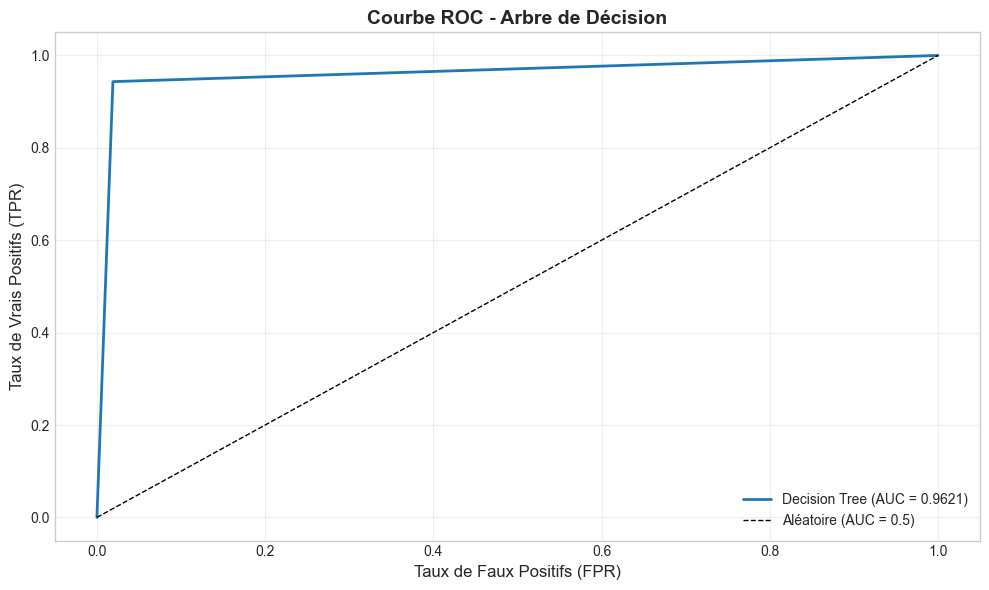

Visualisation de l'arbre (3 premiers niveaux)...


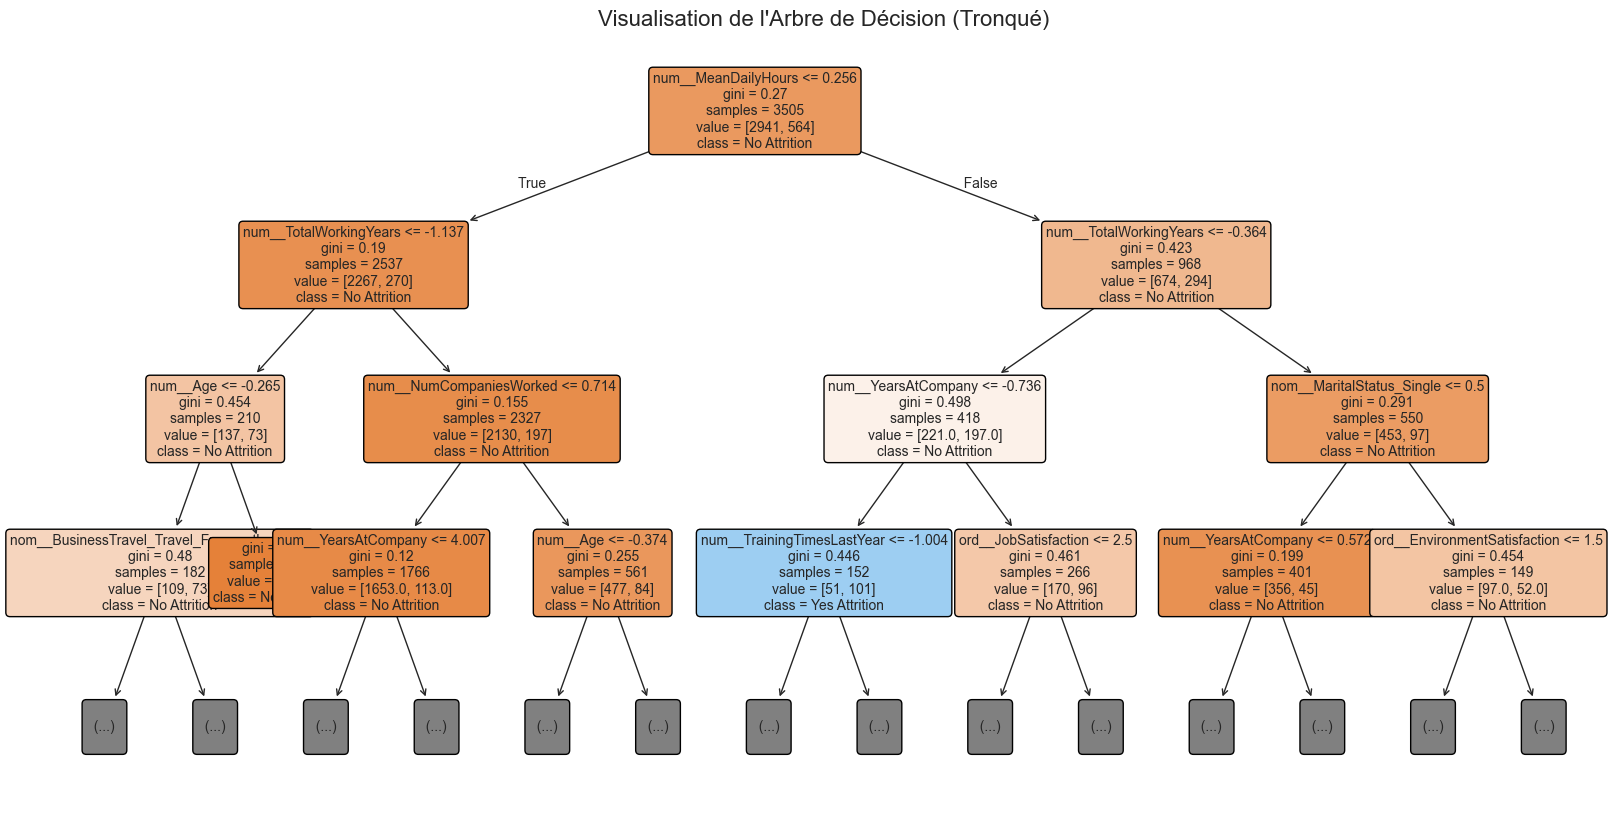

In [31]:
# Import des librairies nécessaires
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

print(' ===== 5. DECISION TREE (Arbre de Décision) =====')
print()

# Initialisation et entraînement du modèle
tree_model = DecisionTreeClassifier(random_state=42)
print('Entraînement de l\'Arbre de Décision...')
tree_model.fit(X_train_processed, y_train)
print('✓ Modèle entraîné!')
print()

# Prédictions sur l'ensemble de test
y_pred_tree = tree_model.predict(X_test_processed)
y_pred_proba_tree = tree_model.predict_proba(X_test_processed)[:, 1]  # Probabilités pour la classe 1

# Calcul de l'exactitude (accuracy)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Accuracy (Exactitude): {accuracy_tree:.4f} ({accuracy_tree*100:.2f}%)')
print()

# Matrice de confusion
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print('Matrice de Confusion (Decision Tree):')
print(conf_matrix_tree)
print(f'  TN (Vrais Négatifs): {conf_matrix_tree[0,0]}')
print(f'  FP (Faux Positifs): {conf_matrix_tree[0,1]}')
print(f'  FN (Faux Négatifs): {conf_matrix_tree[1,0]}')
print(f'  TP (Vrais Positifs): {conf_matrix_tree[1,1]}')
print()

# Rapport de classification
print('Rapport de Classification (Decision Tree):')
print(classification_report(y_test, y_pred_tree, target_names=['No Attrition', 'Attrition']))

# AUC-ROC
roc_auc_tree = roc_auc_score(y_test, y_pred_proba_tree)
print(f'AUC-ROC Score: {roc_auc_tree:.4f}')
print()

# Courbe ROC
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_pred_proba_tree)

plt.figure(figsize=(10, 6))
plt.plot(fpr_tree, tpr_tree, linewidth=2, label=f'Decision Tree (AUC = {roc_auc_tree:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Aléatoire (AUC = 0.5)')
plt.xlabel('Taux de Faux Positifs (FPR)', fontsize=12)
plt.ylabel('Taux de Vrais Positifs (TPR)', fontsize=12)
plt.title('Courbe ROC - Arbre de Décision', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Bonus : Visualisation de l'arbre (limité en profondeur pour la lisibilité)
print("Visualisation de l'arbre (3 premiers niveaux)...")
plt.figure(figsize=(20, 10))
plot_tree(tree_model, max_depth=3, filled=True, feature_names=preprocessor.get_feature_names_out(), class_names=['No Attrition', 'Yes Attrition'], rounded=True, fontsize=10)
plt.title("Visualisation de l'Arbre de Décision (Tronqué)", fontsize=16)
plt.show()


### 6. Random Forest

### Rappel des Forêts Aléatoires (Random Forest)

Les forêts aléatoires sont une méthode d'ensemble puissante et flexible utilisée pour les tâches de classification et de régression. Elles combinent plusieurs arbres de décision pour améliorer les performances prédictives et réduire les risques de surapprentissage.

#### Principe de Fonctionnement

Une forêt aléatoire est constituée de nombreux arbres de décision indépendants, chacun construit sur un échantillon aléatoire des données d'entraînement et utilisant un sous-ensemble aléatoire des caractéristiques pour chaque division de l'arbre. Les prédictions de tous les arbres sont ensuite combinées pour produire une seule prédiction finale.

#### Construction de la Forêt Aléatoire

1. **Échantillonnage Bootstrap** : Pour chaque arbre de la forêt, un échantillon aléatoire avec remplacement (bootstrap) des données d'entraînement est créé. Cela signifie que certains exemples peuvent être sélectionnés plusieurs fois, tandis que d'autres peuvent ne pas être sélectionnés du tout.
2. **Sélection de Sous-ensembles de Caractéristiques** : À chaque nœud de chaque arbre, un sous-ensemble aléatoire des caractéristiques est sélectionné. L'arbre choisit la meilleure division parmi ce sous-ensemble de caractéristiques.
3. **Construction des Arbres** : Les arbres de décision sont construits jusqu'à leur complétion sans élagage. Cela permet à chaque arbre de capturer des modèles complexes dans les données.
4. **Agrégation des Prédictions** : Pour la classification, chaque arbre vote pour une classe, et la classe avec le plus de votes est choisie comme prédiction finale (majority voting). Pour la régression, la moyenne des prédictions de tous les arbres est utilisée.

#### Avantages et Inconvénients

##### Avantages :
- **Réduction du Surapprentissage** : En combinant les prédictions de plusieurs arbres, les forêts aléatoires réduisent le risque de surapprentissage par rapport aux arbres de décision individuels.
- **Robustesse** : Insensibles aux variations dans les données d'entraînement. Les forêts aléatoires sont moins sensibles aux fluctuations dans les données d'entraînement.
- **Gestion des Caractéristiques** : Capables de gérer un grand nombre de caractéristiques et de déterminer les plus importantes.
- **Manipulation des Données Manquantes** : Peuvent gérer des valeurs manquantes en imputant des valeurs basées sur les arbres de la forêt.

##### Inconvénients :
- **Complexité et Temps de Calcul** : Les forêts aléatoires nécessitent plus de temps de calcul et de mémoire par rapport aux arbres de décision individuels, surtout lorsque le nombre d'arbres est élevé.
- **Interprétabilité** : Moins interprétables que les arbres de décision individuels en raison de la combinaison de nombreux arbres.

#### Applications

- **Classification** : Utilisées pour des tâches de classification dans divers domaines comme la finance, la médecine et le marketing.
- **Régression** : Prédiction de valeurs continues dans des contextes tels que la prévision des prix de l'immobilier et la prédiction des ventes.
- **Sélection de Caractéristiques** : Identification des caractéristiques les plus importantes pour la prédiction.

Les forêts aléatoires sont un outil puissant pour améliorer les performances prédictives et la robustesse des modèles de décision, en combinant la force de multiples arbres de décision tout en atténuant leurs faiblesses individuelles.


 ===== 6. RANDOM FOREST (Forêts Aléatoires) =====

Entraînement de la Forêt Aléatoire...
✓ Modèle entraîné!

Accuracy (Exactitude): 0.9715 (97.15%)

Matrice de Confusion (Random Forest):
[[736   0]
 [ 25 116]]
  TN (Vrais Négatifs): 736
  FP (Faux Positifs): 0
  FN (Faux Négatifs): 25
  TP (Vrais Positifs): 116

Rapport de Classification (Random Forest):
              precision    recall  f1-score   support

No Attrition       0.97      1.00      0.98       736
   Attrition       1.00      0.82      0.90       141

    accuracy                           0.97       877
   macro avg       0.98      0.91      0.94       877
weighted avg       0.97      0.97      0.97       877

AUC-ROC Score: 0.9997



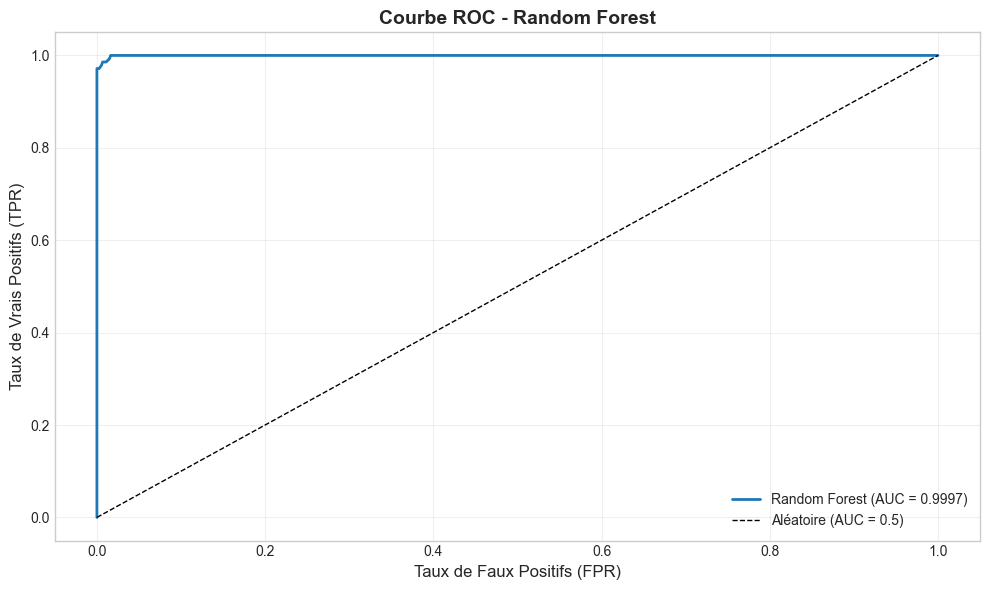

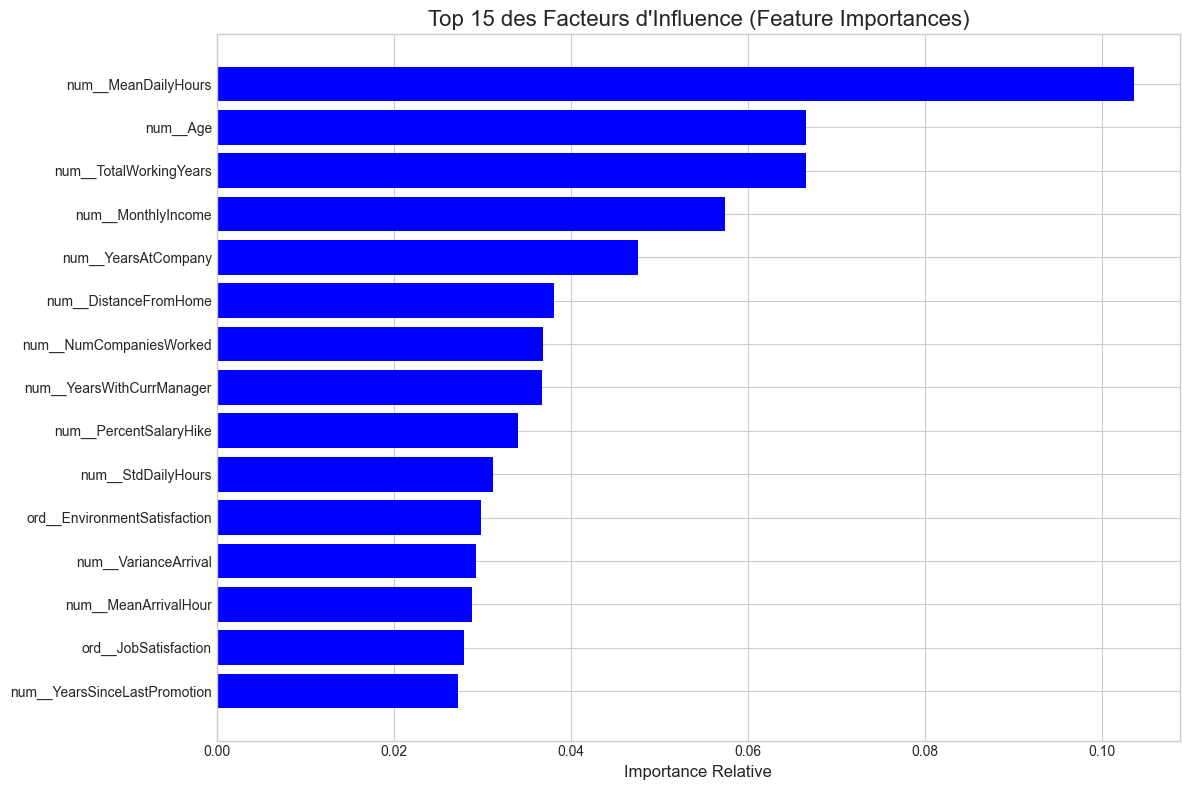

In [32]:
# Import des librairies nécessaires
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print(' ===== 6. RANDOM FOREST (Forêts Aléatoires) =====')
print()

# Initialisation et entraînement du modèle
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
print('Entraînement de la Forêt Aléatoire...')
rf_model.fit(X_train_processed, y_train)
print('✓ Modèle entraîné!')
print()

# Prédictions
y_pred_rf = rf_model.predict(X_test_processed)
y_pred_proba_rf = rf_model.predict_proba(X_test_processed)[:, 1]  # Probabilités pour la classe 1

# Calcul de l'exactitude (accuracy)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy (Exactitude): {accuracy_rf:.4f} ({accuracy_rf*100:.2f}%)')
print()

# Matrice de confusion
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print('Matrice de Confusion (Random Forest):')
print(conf_matrix_rf)
print(f'  TN (Vrais Négatifs): {conf_matrix_rf[0,0]}')
print(f'  FP (Faux Positifs): {conf_matrix_rf[0,1]}')
print(f'  FN (Faux Négatifs): {conf_matrix_rf[1,0]}')
print(f'  TP (Vrais Positifs): {conf_matrix_rf[1,1]}')
print()

# Rapport de classification
print('Rapport de Classification (Random Forest):')
print(classification_report(y_test, y_pred_rf, target_names=['No Attrition', 'Attrition']))

# AUC-ROC
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f'AUC-ROC Score: {roc_auc_rf:.4f}')
print()

# Courbe ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, linewidth=2, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Aléatoire (AUC = 0.5)')
plt.xlabel('Taux de Faux Positifs (FPR)', fontsize=12)
plt.ylabel('Taux de Vrais Positifs (TPR)', fontsize=12)
plt.title('Courbe ROC - Random Forest', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Bonus : Visualisation de l'importance des variables (Features Importance)
# Note: Cela nécessite d'avoir accès aux noms des features du preprocessor
try:
    feature_names = preprocessor.get_feature_names_out()
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Top 15 features
    top_n = 15
    plt.figure(figsize=(12, 8))
    plt.title(f"Top {top_n} des Facteurs d'Influence (Feature Importances)", fontsize=16)
    plt.barh(range(top_n), importances[indices[:top_n]][::-1], color='b', align='center')
    plt.yticks(range(top_n), [feature_names[i] for i in indices[:top_n]][::-1], fontsize=10)
    plt.xlabel('Importance Relative', fontsize=12)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Impossible d'afficher l'importance des variables: {e}")


### 7. Gradient Boosting

 ===== 7. GRADIENT BOOSTING =====

Entraînement du Gradient Boosting...
✓ Modèle entraîné!

Accuracy (Exactitude): 0.9054 (90.54%)

Matrice de Confusion (Gradient Boosting):
[[728   8]
 [ 75  66]]
  TN (Vrais Négatifs): 728
  FP (Faux Positifs): 8
  FN (Faux Négatifs): 75
  TP (Vrais Positifs): 66

Rapport de Classification (Gradient Boosting):
              precision    recall  f1-score   support

No Attrition       0.91      0.99      0.95       736
   Attrition       0.89      0.47      0.61       141

    accuracy                           0.91       877
   macro avg       0.90      0.73      0.78       877
weighted avg       0.90      0.91      0.89       877

AUC-ROC Score: 0.9026



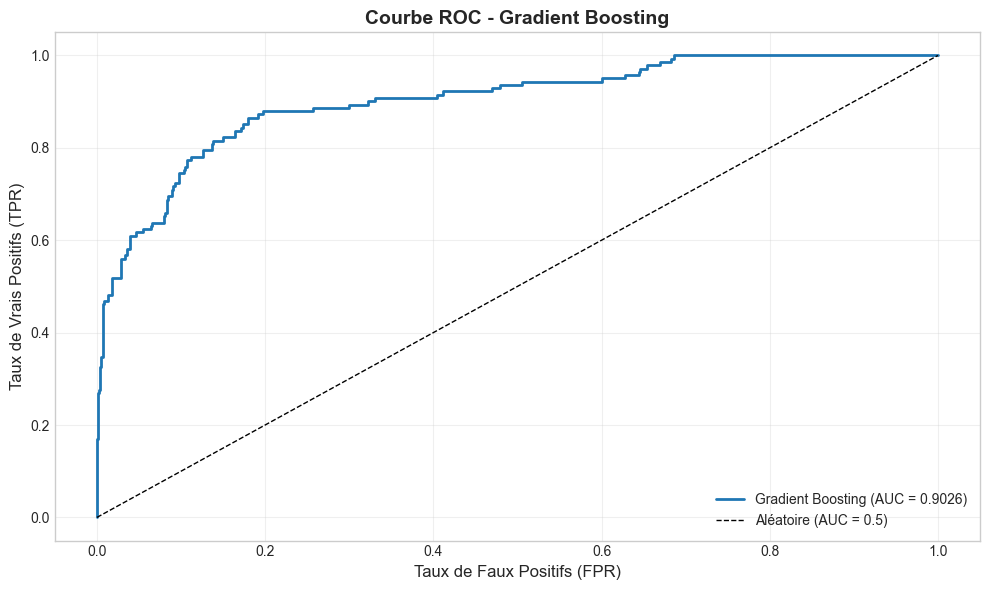

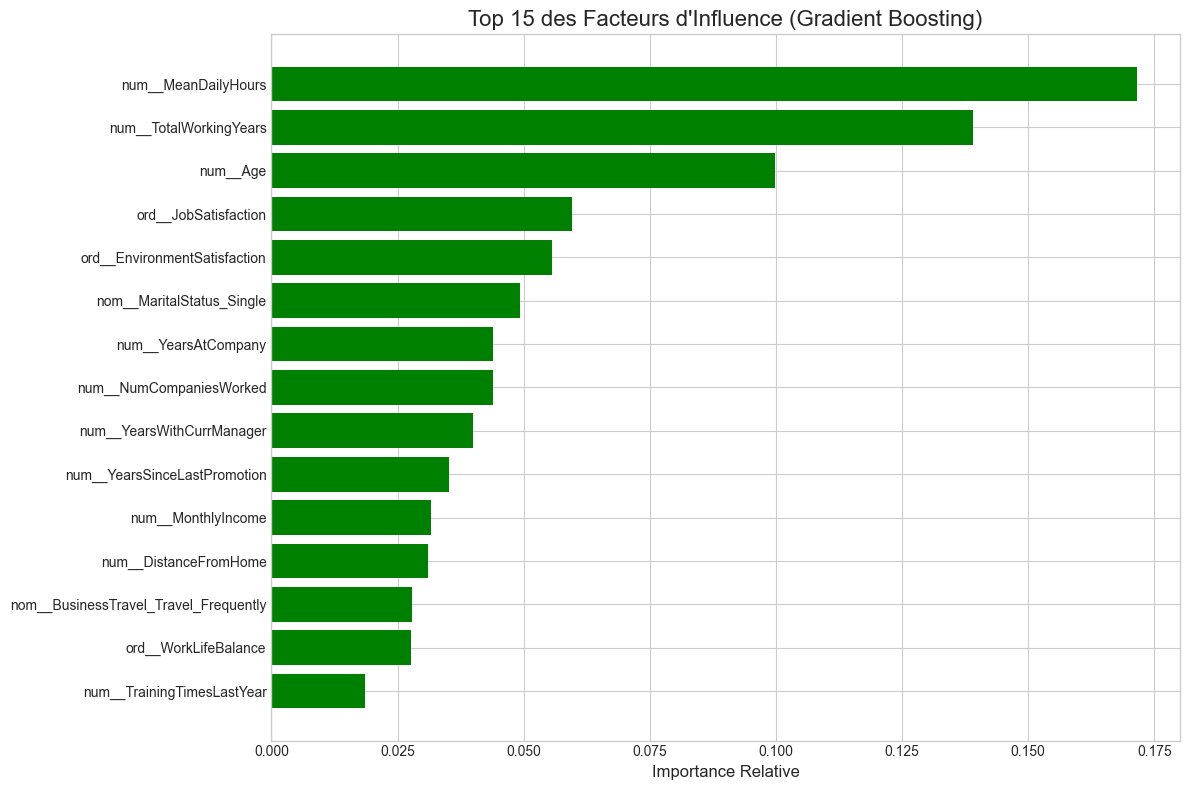

In [33]:
# Import des librairies nécessaires
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print(' ===== 7. GRADIENT BOOSTING =====')
print()

# Initialisation et entraînement du modèle
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
print('Entraînement du Gradient Boosting...')
gb_model.fit(X_train_processed, y_train)
print('✓ Modèle entraîné!')
print()

# Prédictions
y_pred_gb = gb_model.predict(X_test_processed)
y_pred_proba_gb = gb_model.predict_proba(X_test_processed)[:, 1]  # Probabilités pour la classe 1

# Calcul de l'exactitude (accuracy)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Accuracy (Exactitude): {accuracy_gb:.4f} ({accuracy_gb*100:.2f}%)')
print()

# Matrice de confusion
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print('Matrice de Confusion (Gradient Boosting):')
print(conf_matrix_gb)
print(f'  TN (Vrais Négatifs): {conf_matrix_gb[0,0]}')
print(f'  FP (Faux Positifs): {conf_matrix_gb[0,1]}')
print(f'  FN (Faux Négatifs): {conf_matrix_gb[1,0]}')
print(f'  TP (Vrais Positifs): {conf_matrix_gb[1,1]}')
print()

# Rapport de classification
print('Rapport de Classification (Gradient Boosting):')
print(classification_report(y_test, y_pred_gb, target_names=['No Attrition', 'Attrition']))

# AUC-ROC
roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb)
print(f'AUC-ROC Score: {roc_auc_gb:.4f}')
print()

# Courbe ROC
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_proba_gb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_gb, tpr_gb, linewidth=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Aléatoire (AUC = 0.5)')
plt.xlabel('Taux de Faux Positifs (FPR)', fontsize=12)
plt.ylabel('Taux de Vrais Positifs (TPR)', fontsize=12)
plt.title('Courbe ROC - Gradient Boosting', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Bonus : Visualisation de l'importance des variables (Features Importance)
try:
    feature_names = preprocessor.get_feature_names_out()
    importances = gb_model.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Top 15 features
    top_n = 15
    plt.figure(figsize=(12, 8))
    plt.title(f"Top {top_n} des Facteurs d'Influence (Gradient Boosting)", fontsize=16)
    plt.barh(range(top_n), importances[indices[:top_n]][::-1], color='g', align='center')
    plt.yticks(range(top_n), [feature_names[i] for i in indices[:top_n]][::-1], fontsize=10)
    plt.xlabel('Importance Relative', fontsize=12)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Impossible d'afficher l'importance des variables: {e}")


### 8. k-plus proches voisins

 ===== 8. k-NN (k-Plus Proches Voisins) =====

Entraînement du modèle k-NN...
✓ Modèle entraîné!

Accuracy (Exactitude): 0.8837 (88.37%)

Matrice de Confusion (k-NN):
[[715  21]
 [ 81  60]]
  TN (Vrais Négatifs): 715
  FP (Faux Positifs): 21
  FN (Faux Négatifs): 81
  TP (Vrais Positifs): 60

Rapport de Classification (k-NN):
              precision    recall  f1-score   support

No Attrition       0.90      0.97      0.93       736
   Attrition       0.74      0.43      0.54       141

    accuracy                           0.88       877
   macro avg       0.82      0.70      0.74       877
weighted avg       0.87      0.88      0.87       877

AUC-ROC Score: 0.9240



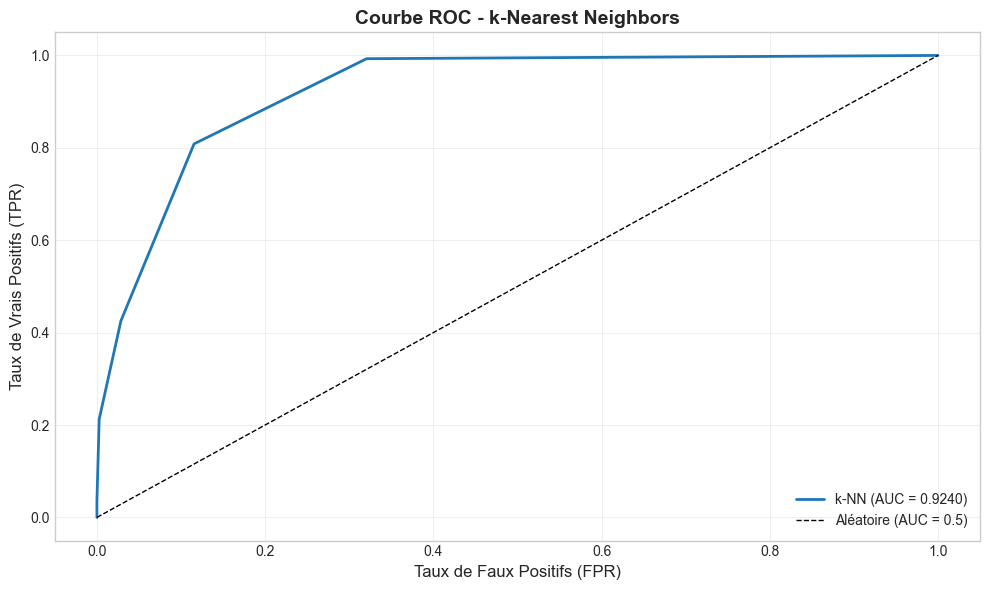

In [34]:
# Import des librairies nécessaires
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

print(' ===== 8. k-NN (k-Plus Proches Voisins) =====')
print()

# Initialisation et entraînement du modèle
# n_neighbors=5 est une valeur standard, vous pouvez tester d'autres valeurs
knn = KNeighborsClassifier(n_neighbors=5)
print('Entraînement du modèle k-NN...')
knn.fit(X_train_processed, y_train)
print('✓ Modèle entraîné!')
print()

# Prédictions sur l'ensemble de test
y_pred_knn = knn.predict(X_test_processed)
y_pred_proba_knn = knn.predict_proba(X_test_processed)[:, 1]  # Probabilités pour la classe 1

# Calcul de l'exactitude (accuracy)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy (Exactitude): {accuracy_knn:.4f} ({accuracy_knn*100:.2f}%)')
print()

# Matrice de confusion
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print('Matrice de Confusion (k-NN):')
print(conf_matrix_knn)
print(f'  TN (Vrais Négatifs): {conf_matrix_knn[0,0]}')
print(f'  FP (Faux Positifs): {conf_matrix_knn[0,1]}')
print(f'  FN (Faux Négatifs): {conf_matrix_knn[1,0]}')
print(f'  TP (Vrais Positifs): {conf_matrix_knn[1,1]}')
print()

# Rapport de classification
print('Rapport de Classification (k-NN):')
print(classification_report(y_test, y_pred_knn, target_names=['No Attrition', 'Attrition']))

# AUC-ROC
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn)
print(f'AUC-ROC Score: {roc_auc_knn:.4f}')
print()

# Courbe ROC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)

plt.figure(figsize=(10, 6))
plt.plot(fpr_knn, tpr_knn, linewidth=2, label=f'k-NN (AUC = {roc_auc_knn:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Aléatoire (AUC = 0.5)')
plt.xlabel('Taux de Faux Positifs (FPR)', fontsize=12)
plt.ylabel('Taux de Vrais Positifs (TPR)', fontsize=12)
plt.title('Courbe ROC - k-Nearest Neighbors', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### 9. Bagging Classifier

 ===== 9. BAGGING CLASSIFIER =====

Entraînement du Bagging Classifier...
✓ Modèle entraîné!

Accuracy (Exactitude): 0.9783 (97.83%)

Matrice de Confusion (Bagging):
[[736   0]
 [ 19 122]]
  TN (Vrais Négatifs): 736
  FP (Faux Positifs): 0
  FN (Faux Négatifs): 19
  TP (Vrais Positifs): 122

Rapport de Classification (Bagging):
              precision    recall  f1-score   support

No Attrition       0.97      1.00      0.99       736
   Attrition       1.00      0.87      0.93       141

    accuracy                           0.98       877
   macro avg       0.99      0.93      0.96       877
weighted avg       0.98      0.98      0.98       877

AUC-ROC Score: 0.9975



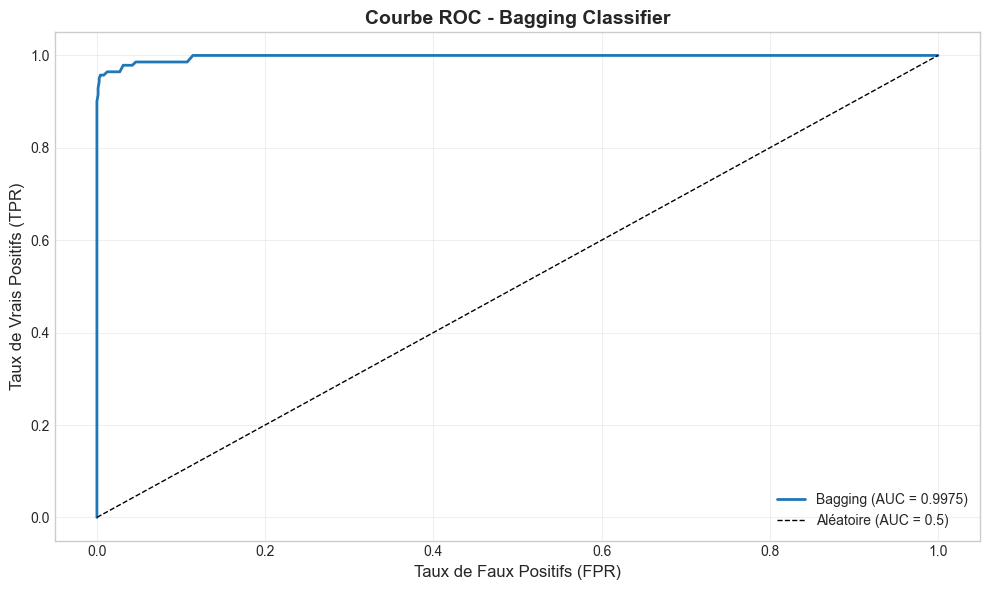

In [35]:
# Import des librairies nécessaires
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

print(' ===== 9. BAGGING CLASSIFIER =====')
print()

# Initialisation et entraînement du modèle
# On utilise DecisionTreeClassifier comme estimateur de base par défaut
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
print('Entraînement du Bagging Classifier...')
bagging_model.fit(X_train_processed, y_train)
print('✓ Modèle entraîné!')
print()

# Prédictions sur l'ensemble de test
y_pred_bagging = bagging_model.predict(X_test_processed)
y_pred_proba_bagging = bagging_model.predict_proba(X_test_processed)[:, 1]  # Probabilités pour la classe 1

# Calcul de l'exactitude (accuracy)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f'Accuracy (Exactitude): {accuracy_bagging:.4f} ({accuracy_bagging*100:.2f}%)')
print()

# Matrice de confusion
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)
print('Matrice de Confusion (Bagging):')
print(conf_matrix_bagging)
print(f'  TN (Vrais Négatifs): {conf_matrix_bagging[0,0]}')
print(f'  FP (Faux Positifs): {conf_matrix_bagging[0,1]}')
print(f'  FN (Faux Négatifs): {conf_matrix_bagging[1,0]}')
print(f'  TP (Vrais Positifs): {conf_matrix_bagging[1,1]}')
print()

# Rapport de classification
print('Rapport de Classification (Bagging):')
print(classification_report(y_test, y_pred_bagging, target_names=['No Attrition', 'Attrition']))

# AUC-ROC
roc_auc_bagging = roc_auc_score(y_test, y_pred_proba_bagging)
print(f'AUC-ROC Score: {roc_auc_bagging:.4f}')
print()

# Courbe ROC
fpr_bagging, tpr_bagging, thresholds_bagging = roc_curve(y_test, y_pred_proba_bagging)

plt.figure(figsize=(10, 6))
plt.plot(fpr_bagging, tpr_bagging, linewidth=2, label=f'Bagging (AUC = {roc_auc_bagging:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Aléatoire (AUC = 0.5)')
plt.xlabel('Taux de Faux Positifs (FPR)', fontsize=12)
plt.ylabel('Taux de Vrais Positifs (TPR)', fontsize=12)
plt.title('Courbe ROC - Bagging Classifier', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# Etude comparative entre les modèles SK-Learn